# Data Exploration and Preparation

## Data

The file movies_merged contains a dataframe with the same name that has 40K rows and 39 columns. Each row represents a movie title and each column represents a descriptor such as Title, Actors, and Budget. I collected the data by querying IMDb’s API (see www.omdbapi.com) and joining it with a separate dataset of movie budgets and gross earnings (unknown to you). The join key was the movie title. This data is available for personal use, but IMDb’s terms of service do not allow it to be used for commercial purposes or for creating a competing repository.

## Objective

Your goal is to investigate the relationship between the movie descriptors and the box office success of movies, as represented by the variable Gross. This task is extremely important as it can help a studio decide which titles to fund for production, how much to bid on produced movies, when to release a title, how much to invest in marketing and PR, etc. This information is most useful before a title is released, but it is still very valuable after the movie is already released to the public (for example it can affect additional marketing spend or how much a studio should negotiate with on-demand streaming companies for “second window” streaming rights).

## Setup

### Load Packages

In [ ]:
# You may load other packages like seaborn for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

### Load Data

Load the CSV file into a dataframe called "df" and perform the following initial investigations:
    * list the dimensions of the df
    * list the head
    * list the summary
    * describe the df

In [7]:
df = pd.read_csv("./movies.csv") 

print(df.shape) # to list dimensions of the dataframe

print(df.head()) # to list head which is top 5 rows

print(df.info()) # gives information about the data in a summarized format

print(df.describe()) # lists a statistical overview of the dataframe data

(40789, 40)
   Unnamed: 0              Title  Year      Rated    Released  Runtime  \
0           1  39 Pounds of Love  2005    UNRATED  2005-04-08   70 min   
1           2               3:am  2005  NOT RATED  2005-01-25   21 min   
2           3    500 Years Later  2005        NaN  2005-02-24  106 min   
3           4          5th World  2005        NaN  2005-01-20   75 min   
4           5                 90  2005        NaN  2005-03-12   14 min   

                             Genre            Director  \
0  Documentary, Biography, Romance         Dani Menkin   
1                  Short, Thriller       Ryan Bradford   
2                      Documentary  Owen Alik Shahadah   
3                   Drama, Romance     Blackhorse Lowe   
4                       War, Short          Jason Wise   

                         Writer  \
0     Ilan Heitner, Dani Menkin   
1  Ryan Bradford, Ryen Schlegel   
2                   M.K. Asante   
3               Blackhorse Lowe   
4                  

## Tasks

Each task below is worth 10 points, and is meant to be performed sequentially, i.e. do step 2 after you have processed the data as described in step 1. Total points: 100
Complete each task by implementing code chunks as described by TODO comments, and by responding to questions (“Q:”) with written answers (“A:”). If you are unable to find a meaningful or strong relationship in any of the cases when requested, explain why not by referring to appropriate plots/statistics.

### Task 1: Remove non-movie rows

The variable Type captures whether the row is a movie, a TV series, or a game. Remove all rows from df that do not correspond to movies.

In [8]:
df=df[df["Type"]=="movie"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 40788
Data columns (total 40 columns):
Unnamed: 0           40000 non-null int64
Title                40000 non-null object
Year                 40000 non-null int64
Rated                19838 non-null object
Released             35051 non-null object
Runtime              39249 non-null object
Genre                39014 non-null object
Director             39439 non-null object
Writer               36093 non-null object
Actors               38416 non-null object
Plot                 33101 non-null object
Language             38301 non-null object
Country              39438 non-null object
Awards               14727 non-null object
Poster               27015 non-null object
Metascore            5209 non-null float64
imdbRating           38866 non-null float64
imdbVotes            38828 non-null float64
imdbID               40000 non-null object
Type                 40000 non-null object
tomatoMeter          9452 non-n

Question: how many rows are left after removal?

Answer: 40,000


### Task 2: Process Runtime column
The variable Runtime represents the length of the title as a string. Write Python code to convert it to a numeric
value (in minutes) and replace df.Runtime with the new numeric column RuntimeMins.

In [9]:
df.index = range(40000) #this changes the index of the entries to the number of rows which are the records of movies left after dropping non-movies

def RuntimeConversionFunction(x):
    if x == np.nan:
        return x # this returns the NAN values as it is 
    x = str(x)
    
    HrMinMatch = re.match(r"(\d+)\s*[hH]\w*\s*(\d+)\s*[mM]\w*", x) # will match any string in format of x hours and y mins
    HrMatch = re.match(r"(\d+)\s*[hH]\w*",x) # will match any string in the format x hours
    MinMatch = re.match(r"(\d+)\s*[mM]\w*", x) #will match any string in the format y mins

    if HrMinMatch:
        Hours = int(HrMinMatch.groups()[0])
        Mins = int(HrMinMatch.groups()[1])
        TotalMins = Hours * 60 + Mins
        return TotalMins

    elif (HrMatch):   
        Hrs = int(HrMatch.groups()[0])
        Mins = 60*Hrs
        return Mins
    
    else:  
        if MinMatch:
            Mins = int(MinMatch.groups()[0])
            return Mins

df.Runtime = df.Runtime.apply(RuntimeConversionFunction)
df['Runtime']




0         70.0
1         21.0
2        106.0
3         75.0
4         14.0
5         82.0
6         65.0
7          NaN
8         95.0
9         85.0
10       100.0
11        89.0
12        96.0
13        92.0
14        92.0
15        86.0
16        95.0
17       102.0
18       107.0
19        89.0
20        95.0
21        99.0
22       109.0
23        84.0
24        99.0
25         NaN
26       118.0
27       105.0
28       106.0
29        96.0
         ...  
39970    129.0
39971    132.0
39972    178.0
39973    123.0
39974    134.0
39975    124.0
39976    125.0
39977    120.0
39978    149.0
39979    161.0
39980     80.0
39981    105.0
39982     99.0
39983    139.0
39984    135.0
39985     80.0
39986    152.0
39987    122.0
39988    133.0
39989    102.0
39990    172.0
39991    101.0
39992    119.0
39993    120.0
39994    129.0
39995    126.0
39996    100.0
39997    151.0
39998    110.0
39999    165.0
Name: Runtime, Length: 40000, dtype: float64


Now investigate the distribution of Runtime values and how it changes over years (variable Year, which you can bucket into decades) and in relation to the budget (variable Budget). Include any plots that illustrate.

In [1]:
sns.distplot(df.Runtime.dropna(), hist=True, kde=True, color = 'darkblue', hist_kws={'edgecolor':'black'})
df.Runtime.describe()
plt.title(" Figure 1: Runtime Frequency",fontsize=20)
plt.rcParams['figure.figsize'] = (20,10)


NameError: name 'sns' is not defined

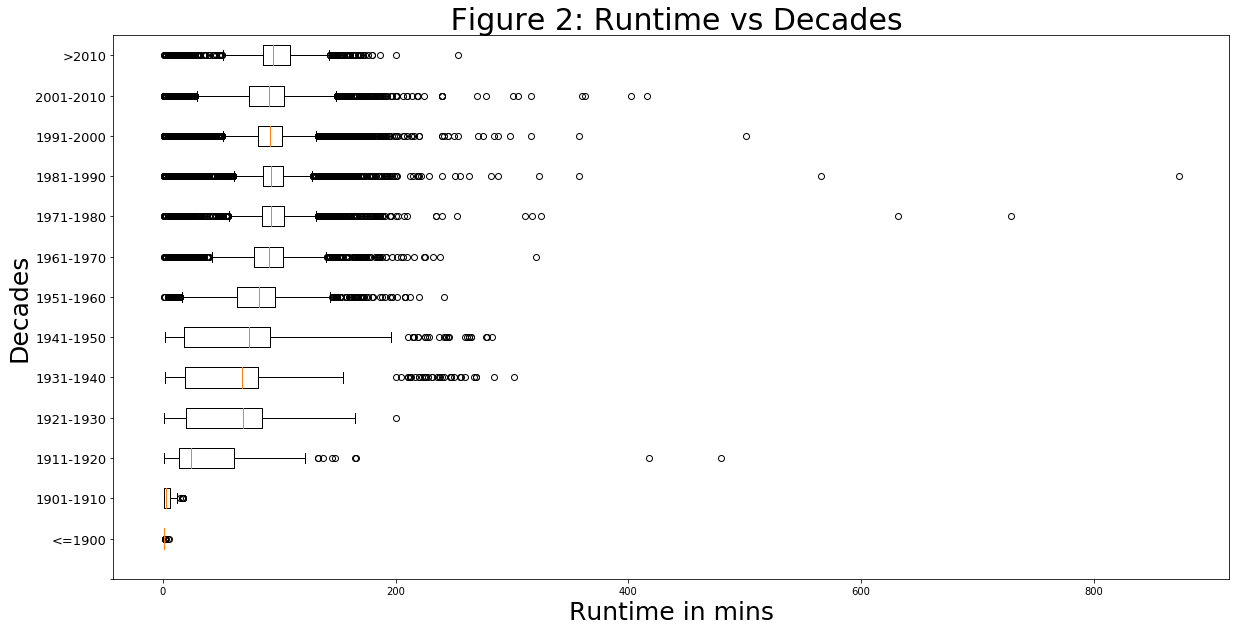

In [6]:
Dec1 = df[(df['Year']<=1900)] #creating buckets for the decades
Dec2 = df[(df['Year']<=1910) & (df['Year']>1900)]
Dec3 = df[(df['Year']<=1920) & (df['Year']>1910)]
Dec4 = df[(df['Year']<=1930) & (df['Year']>1920)]
Dec5 = df[(df['Year']<=1940) & (df['Year']>1930)]
Dec6 = df[(df['Year']<=1950) & (df['Year']>1940)]
Dec7 = df[(df['Year']<=1960) & (df['Year']>1950)]
Dec8 = df[(df['Year']<=1970) & (df['Year']>1960)]
Dec9 = df[(df['Year']<=1980) & (df['Year']>1970)]
Dec10 = df[(df['Year']<=1990) & (df['Year']>1980)]
Dec11 = df[(df['Year']<=2000) & (df['Year']>1990)]
Dec12 = df[(df['Year']<=2010) & (df['Year']>2000)]
Dec13 = df[df['Year']>2010]


Decades=[Dec1['Runtime'].dropna(),Dec2['Runtime'].dropna(),Dec3['Runtime'].dropna(),Dec4['Runtime'].dropna(),Dec5['Runtime'].dropna(),Dec6['Runtime'].dropna(),Dec7['Runtime'].dropna(),Dec8['Runtime'].dropna(),Dec9['Runtime'].dropna(),Dec10['Runtime'].dropna(),Dec11['Runtime'].dropna(),Dec12['Runtime'].dropna(),Dec13['Runtime'].dropna()]

# Plotting Runtime accross decades using boxplots

fig, ax = plt.subplots(figsize=(20,10))

ax.boxplot(Decades,vert = False)

plt.ylabel('Decades',fontsize=25)

plt.xlabel('Runtime in mins',fontsize=25)

plt.yticks(np.arange(14),('','<=1900','1901-1910','1911-1920','1921-1930','1931-1940','1941-1950','1951-1960','1961-1970','1971-1980','1981-1990','1991-2000','2001-2010','>2010'),fontsize=13)

plt.title(" Figure 2: Runtime vs Decades",fontsize=30)

plt.show()

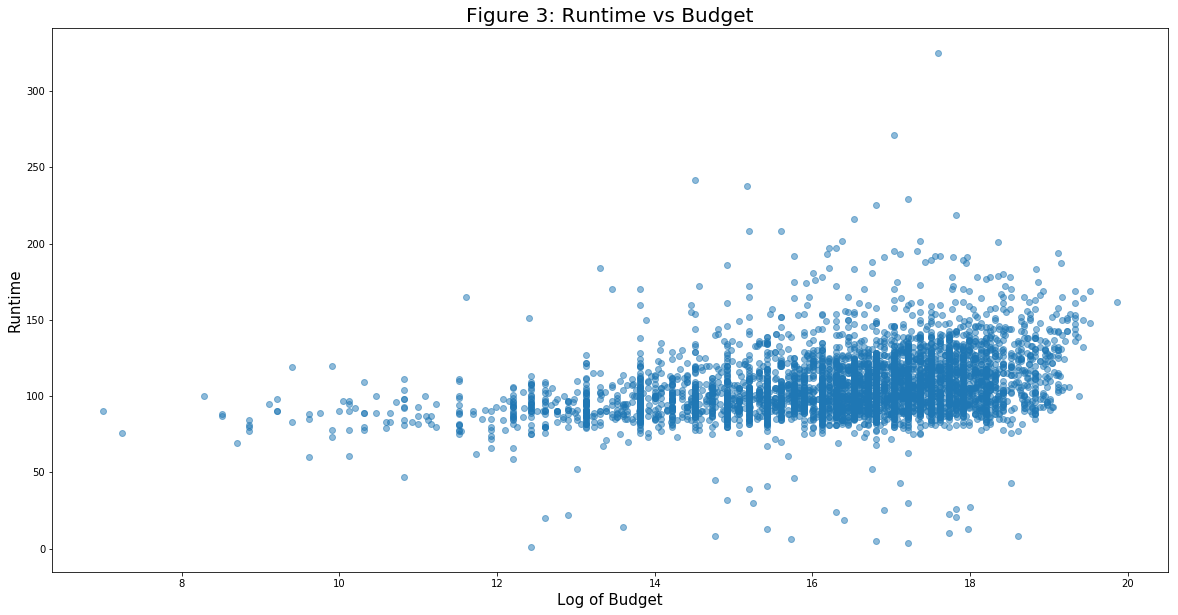

In [7]:
BudgetRuntime = df[(df.Budget.isnull() == False) & (df.Runtime.isnull() == False)] #using the non-NaN values of Budget from original dataframe adn using it in Runtime

columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster', 'Metascore','imdbRating', 'imdbVotes', 'imdbID', 'Type', 'tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus', 'tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response','Domestic_Gross', 'Gross','Date']

BudgetRuntime = BudgetRuntime.drop(columns , axis=1)

plt.title("Figure 3: Runtime vs Budget",fontsize = 20)

plt.xlabel("Log of Budget",fontsize = 15)

plt.ylabel("Runtime",fontsize = 15)

plt.scatter(x = np.log(BudgetRuntime.Budget), y = BudgetRuntime.Runtime,alpha = 0.5)

plt.show()

Question: Comment on the distribution as well as relationships. Are there any patterns or trends that you can observe? Enter answer in the below cell.

Answer:

Figure 1:
By using df.describe() on Runtime, we found that the minimum Runtime of a movie was 1 minute and the maximum was 873 minutes. The average Runtime movies was around 82 minutes and the median was 90. There are two peaks to the graph thus its bimodal

Figure 2: 
Runtime distribution has almost no variation before the 1910s and Runtime is pretty low too. The drastically increases from 1911 to 1920 and continues to do so till 1940s. After the 1950s the distribution becomes more stable with low variation

Figure 3:
From Figure 3 it can said that there is a positive correlation between Runtime and Budget

### Task 3: Encode Genre Column

The column Genre represents a list of genres associated with the movie in a string format. Write code to parse each text string into a binary vector with 1s representing the presence of a genre and 0s the absence, and add it to the dataframe as additional columns. Then remove the original Genre column.
For example, if there are a total of 3 genres: Drama, Comedy, and Action, a movie that is both Action and Comedy should be represented by a binary vector <0, 1, 1>. Note that you need to first compile a dictionary of all possible genres and then figure out which movie has which genres.

In [32]:
G = {}
def GenreCount(g): #this functions finds the count of unique Genres in the dataframe
    if type(g)==float: # if None case is there
        return 
    lyst = g.split(',')
    
    for i in range(len(lyst)):
        lyst[i] = lyst[i].strip()
        
    for i in lyst:
        if i in G.keys():
            G[i] += 1
        else:
            G[i] = 1

df.Genre.apply(GenreCount) #apply GenreCount function to Genre Column of the dataframe


def GenreVector(g): # this function creates Genre Vector for each movie, 1 represents a presence of a particular genre and 0 represents absence
    G1 = {k:0 for k in G.keys()}
    if type(g) == float:
        return
    lyst = g.split(',')
    for i in range(len(lyst)):
        lyst[i] = lyst[i].strip()
    for i in lyst:
        G1[i] += 1
    return G1.values()


df['GenreVector'] = df.Genre.apply(GenreVector) #this creates a new column GenreVector that stores the vector representation of the Genre


df=df.drop('Genre',axis=1) #drops original Genre column and keeps GenreVector column

df


,Unnamed: 0,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Plot,...,Production,Website,Response,Budget,Domestic_Gross,Gross,Date,Wins,Nominations,GenreVector
0,1,39 Pounds of Love,2005,UNRATED,2005-04-08,70 min,Dani Menkin,"Ilan Heitner, Dani Menkin",Ami Ankilewitz,"This is the story of Ami, a man who while unab...",...,NaN,NaN,True,NaN,NaN,NaN,NaN,3.0,0.0,"(1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,3:am,2005,NOT RATED,2005-01-25,21 min,Ryan Bradford,"Ryan Bradford, Ryen Schlegel","Mike Ashworth, Jen Badewitz, Ryan Bradford, Se...",Josh Coen embarks on a twisted odyssey through...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,500 Years Later,2005,NaN,2005-02-24,106 min,Owen Alik Shahadah,M.K. Asante,"Kolfi Adu, Sona Jobarteh, Hunter Adams III, Ha...","Crime, drugs, HIV/AIDS, poor education, inferi...",...,Codeblack TV,http://www.500yearslater.com/,True,NaN,NaN,NaN,NaN,2.0,0.0,"(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,5th World,2005,NaN,2005-01-20,75 min,Blackhorse Lowe,Blackhorse Lowe,"Livandrea Knoki, Sheldon Silentwalker, Ernest ...",Two young Navajos hitch hike home through the ...,...,NaN,http://www.variety.com/review/VE1117926147.htm...,True,NaN,NaN,NaN,NaN,1.0,0.0,"(0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,90,2005,NaN,2005-03-12,14 min,Jason Wise,Jason Wise,"Bryan Barnett-Woods, Oto Brezina, Mike Dunn, E...",A holocaust survivor and an SS officer have a ...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,6,Abel Raises Cain,2005,NaN,2005-01-23,82 min,"Jenny Abel, Jeff Hockett","Jenny Abel, Jeff Hockett","Alan Abel, Jeanne Abel, Frank Murgalo, Jenny Abel",Filmmaker Jenny Abel explores the life and car...,...,Powderhouse Productions,NaN,True,NaN,NaN,NaN,NaN,5.0,0.0,"(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,7,Acne,2000,NaN,2005-06-03,65 min,Rusty Nails,Rusty Nails,"Tracey Hayes, Rusty Nails, Jim Darley, Mary Lu...",Franny and Zoe wake up one morning ready to go...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, ..."
7,8,One Senseless Act: The Khamisa Story,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,"(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,9,Akoibon,2005,NaN,2005-04-13,95 min,Edouard Baer,Edouard Baer,"Jean Rochefort, Nader Boussandel, Marie Denarn...",A disparate group of people meet at a hotel on...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ..."
9,10,Alien Abduction,2014,NOT RATED,2014-05-01,85 min,Matty Beckerman,Robert Lewis,"Katherine Sigismund, Corey Eid, Riley Polanski...",A vacationing family encounters an alien threa...,...,IFC Films,http://www.alienabductionfilm.com/,True,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..."


What are the 10 most common genres? Plot the relative proportions of movies having the top 10 most common genres.

The top 10 most common genres are: 
Drama   15859
Comedy   12849
Short   6516
Romance   4975
Action   4413
Crime   4062
Thriller   3380
Documentary   3051
Adventure   2928
Animation   2788


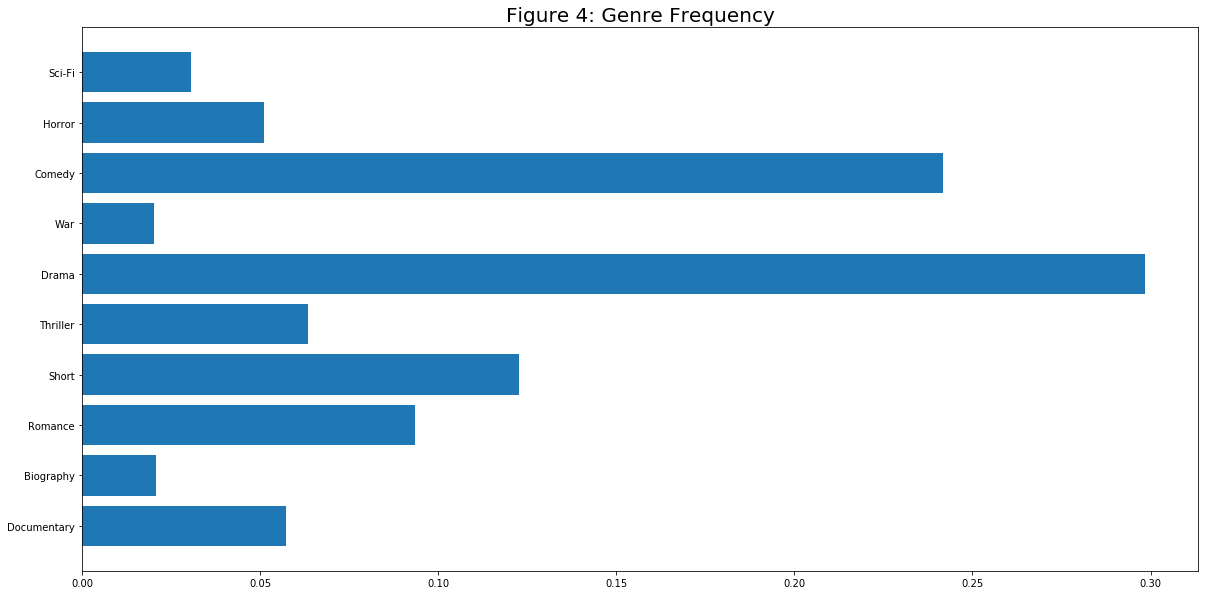

In [21]:
Dict = sorted(G.items(), key=lambda x: x[1],reverse=True)
Dict = dict(Dict)

print("The top 10 most common genres are: ")
ind = 1
for i in Dict.keys():
    if ind > 10:
        break
    print(i," ",Dict[i])
    ind += 1
    
# Copying 10 most common genres in a new dictionary
DictNew = {}
ind = 1
count = 0
# Also calculating the sum of all the values in G
for i in G.keys():
    if ind > 10:
        break
    DictNew[i] = G[i]
    ind += 1
    count += G[i]

# Storing the proportions of these genres as values in the new dictionary subd
for i in DictNew.keys():
    DictNew[i] /= count
    
# Plotting now
plt.barh(y=list(DictNew.keys()),width=list(DictNew.values()))
plt.title("Figure 4: Genre Frequency",fontsize= 20)
plt.show()

Examine how the distribution of Runtime changes across genres for the top 10 most common genres.

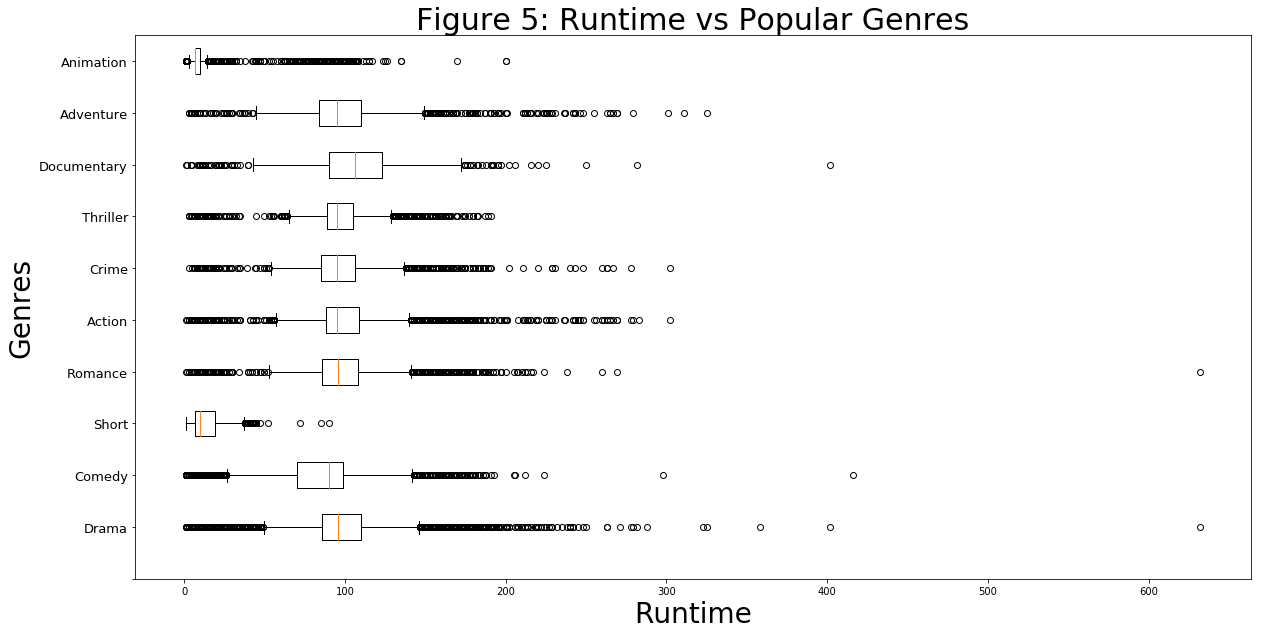

In [22]:
def GenreFunc(lyst1,pos):
    if lyst1 == np.nan or type(lyst1)==float or lyst1 == None: # to check if Genre Vector is not N/A
        return False
    else:
        lyst1 = list(lyst1)
        if lyst1[pos]==1: # to check if the bit in a particular genre position is 1 or not
            return True
        else:
            return False
        

m1 = df['GenreVector'].apply(GenreFunc,pos=5) # Drama # Creating subsets of dataframe according to genres and their repsective order of most common as the position
m2 = df['GenreVector'].apply(GenreFunc,pos=7) # Comedy
m3 = df['GenreVector'].apply(GenreFunc,pos=3) # Short
m4 = df['GenreVector'].apply(GenreFunc,pos=2) # Romance
m5 = df['GenreVector'].apply(GenreFunc,pos=14) # Action
m6 = df['GenreVector'].apply(GenreFunc,pos=13) # Crime
m7 = df['GenreVector'].apply(GenreFunc,pos=4) # Thriller
m8 = df['GenreVector'].apply(GenreFunc,pos=1) # Documentary
m9 = df['GenreVector'].apply(GenreFunc,pos=10) # Adventure
m10 = df['GenreVector'].apply(GenreFunc,pos=19) # Animation

drama=df.Runtime[m1] # Taking Runtimes of the movies bucketed according to the Genre
comedy=df.Runtime[m2]
short=df.Runtime[m3]
romance=df.Runtime[m4]
action=df.Runtime[m5]
crime=df.Runtime[m6]
thriller=df.Runtime[m7]
documentary=df.Runtime[m8]
adventure=df.Runtime[m9]
animation=df.Runtime[m10]

lyst2 = [drama.dropna(),comedy.dropna(),short.dropna(),romance.dropna(),action.dropna(),crime.dropna(),thriller.dropna(),documentary.dropna(),adventure.dropna(),animation.dropna()]

fig, ax = plt.subplots(figsize=(20,10))

ax.boxplot(lyst2,vert = False)

plt.ylabel('Genres',fontsize=28)

plt.xlabel('Runtime',fontsize=28)

plt.yticks(np.arange(11),('','Drama','Comedy','Short','Romance','Action','Crime','Thriller','Documentary','Adventure','Animation'),fontsize=13)

plt.title("Figure 5: Runtime vs Popular Genres",fontsize=30)

plt.show()

### Task 4: Eliminate mismatched rows

The dataframe was put together by merging two different sources of data and it is possible that the merging process was inaccurate in some cases (the merge was done based on movie title, but there are cases of different movies with the same title). The first source’s release time was represented by the column Year (numeric representation of the year) and the second by the column Released (string representation of release date).

Find and remove all rows where you suspect a merge error occurred based on a mismatch between these two variables. To make sure subsequent analysis and modeling work well, avoid removing more than 10% of the rows that have a Gross value present.

In [12]:
for i in range(40000): #this loop replaces 0 values with NaN values in the Gross column
    if df['Gross'][i] == 0.0:
        df['Gross'][i] = np.nan


C:\Users\sushma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#this code checks how many values of column Gross are non-null values when there is a mismatch between Year and Released
valid = 0
invalid= 0

for i in range(40000):
    if (type(df['Released'][i]) == float) or (df.Released[i] == np.nan) or (str(df['Year'][i]) in df['Released'][i]):
        invalid += 1
        continue
    else:
        v = str(df['Gross'][i])
        v = v.lower()
        if v != "nan":
            valid += 1
            
            
print("Valid ",invalid)
print("Invalid but has gross value ",valid)

Valid  34273
Invalid but has gross value  700


In [14]:
a = 0
invalid = 0
for i in range(40000):
    if (df.Released[i]==np.nan) or (type(df['Released'][i])==float) or  (str(df['Year'][i]) in df['Released'][i]):
        invalid += 1
        continue
    else:
        b = str(df['Gross'][i])
        b = b.lower()
        if b != "nan":
            if (a < 630): # as 90% of 700 gross value rows is 630
                a += 1
                invalid += 1
                continue
            else:
                df = df.drop(i,axis=0)
        else:
            df = df.drop(i,axis=0)  
            
print(invalid)
# Altering the indices of the dataframe after dropping some rows to make subsequent calculations easy
df.index=range(34903)
df.info()           

34903
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34903 entries, 0 to 34902
Data columns (total 40 columns):
Unnamed: 0           34903 non-null int64
Title                34903 non-null object
Year                 34903 non-null int64
Rated                17170 non-null object
Released             29954 non-null object
Runtime              34169 non-null float64
Director             34357 non-null object
Writer               31367 non-null object
Actors               33473 non-null object
Plot                 28650 non-null object
Language             33342 non-null object
Country              34353 non-null object
Awards               12256 non-null object
Poster               23030 non-null object
Metascore            4627 non-null float64
imdbRating           33780 non-null float64
imdbVotes            33746 non-null float64
imdbID               34903 non-null object
Type                 34903 non-null object
tomatoMeter          8101 non-null float64
tomatoImage          809

### Task 5: Explore Gross revenue

For the commercial success of a movie, production houses want to maximize Gross revenue. Investigate if
Gross revenue is related to Budget, Runtime or Genre in any way.
Note: To get a meaningful relationship, you may have to partition the movies into subsets such as short vs. long duration, or by genre, etc.

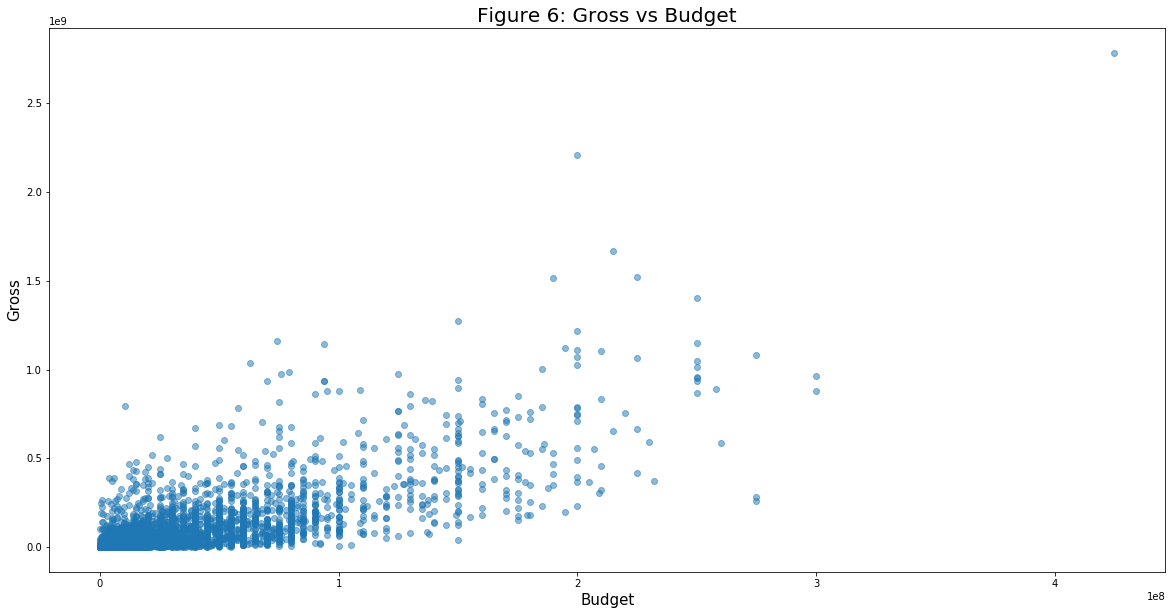

In [23]:
Budget = df.Budget[df['Gross']>0] 

plt.title('Figure 6: Gross vs Budget',fontsize =  20)

plt.xlabel('Budget',fontsize = 15)

plt.ylabel('Gross',fontsize = 15)

plt.scatter( x = Budget, y = df.Budget.dropna(),alpha=0.5)

plt.show()


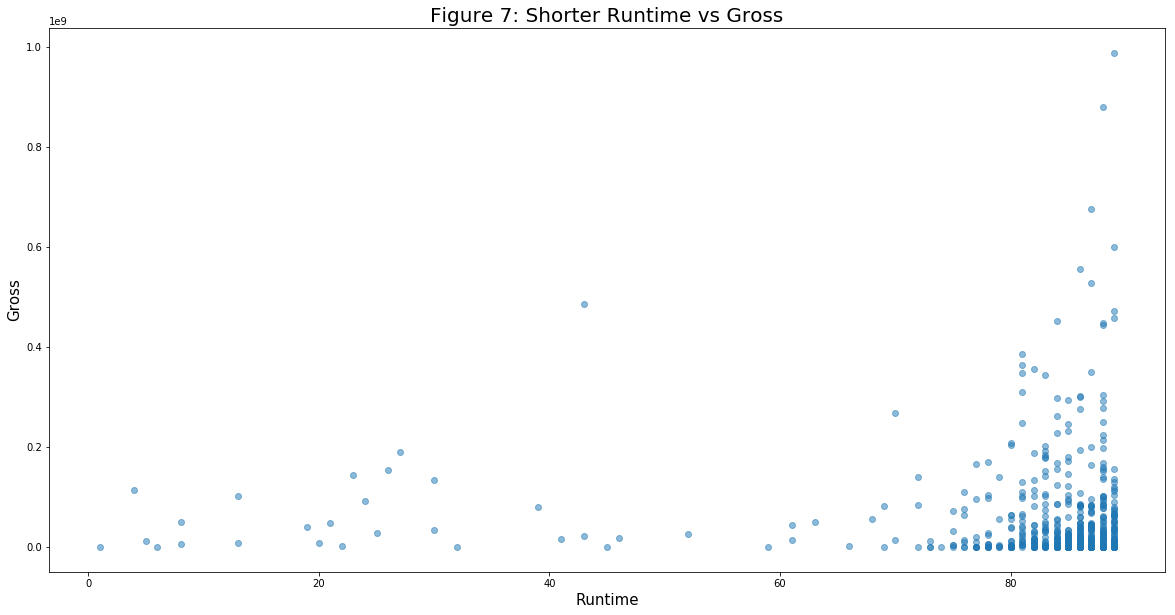

In [24]:
ShortMovies = df[(df.Gross>0) & (df.Runtime<(90.0))] #selecting the movies with a short runtime

NotNeeded=['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type','tomatoMeter', 'tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus', 'tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Date', 'GenreVector']

ShortMovies = ShortMovies.drop(NotNeeded,axis=1) # by doing so we drop the not needed columns

dfLongRun = df[(df.Gross>0) & (df.Runtime>=90.0)]  #selecting the movies with a longer runtime

LongMovies = dfLongRun.drop(NotNeeded,axis=1)

plt.scatter(x = ShortMovies.Runtime, y = ShortMovies.Gross.dropna(), alpha = 0.5) #plotting short runtime movies vs gross

plt.title('Figure 7: Shorter Runtime vs Gross',fontsize = 20)

plt.xlabel('Runtime',fontsize = 15)

plt.ylabel('Gross',fontsize = 15)

plt.show()

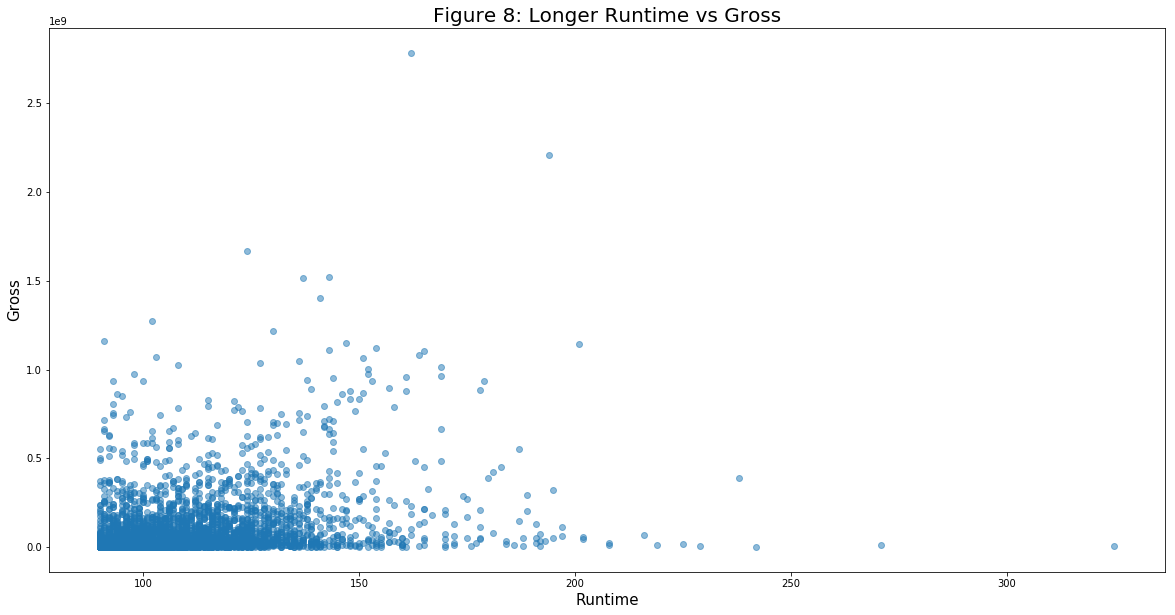

In [25]:
plt.scatter(x= LongMovies.Runtime, y= LongMovies.Gross.dropna(),alpha=0.5) #plotting long runtime movies vs gross

plt.title('Figure 8: Longer Runtime vs Gross',fontsize = 20)

plt.xlabel('Runtime',fontsize = 15)

plt.ylabel('Gross',fontsize = 15)

plt.show()

As seen above in the graphs, there seems to extremely little correlation between Movies with a shorter Runtime and their Gross value. Also, there is little positive correlation between movies with a longer duration and their Gross value. The concentraion of correlation is concentrated in the middle of the entire Runtime distribution i.e. correlation exists for 'long short movies' and 'short long movies'. This correlation becomes negligible/ceases to exist when one considers very short or very long movies.

28
{'Documentary': 3051, 'Biography': 1109, 'Romance': 4975, 'Short': 6516, 'Thriller': 3380, 'Drama': 15859, 'War': 1070, 'Comedy': 12849, 'Horror': 2716, 'Sci-Fi': 1624, 'Adventure': 2928, 'Family': 2653, 'History': 830, 'Crime': 4062, 'Action': 4413, 'Music': 1184, 'Mystery': 1642, 'Fantasy': 1400, 'Sport': 525, 'Animation': 2788, 'Musical': 1387, 'Talk-Show': 4, 'Adult': 422, 'Western': 1314, 'Film-Noir': 352, 'Reality-TV': 6, 'News': 20, 'Game-Show': 2}


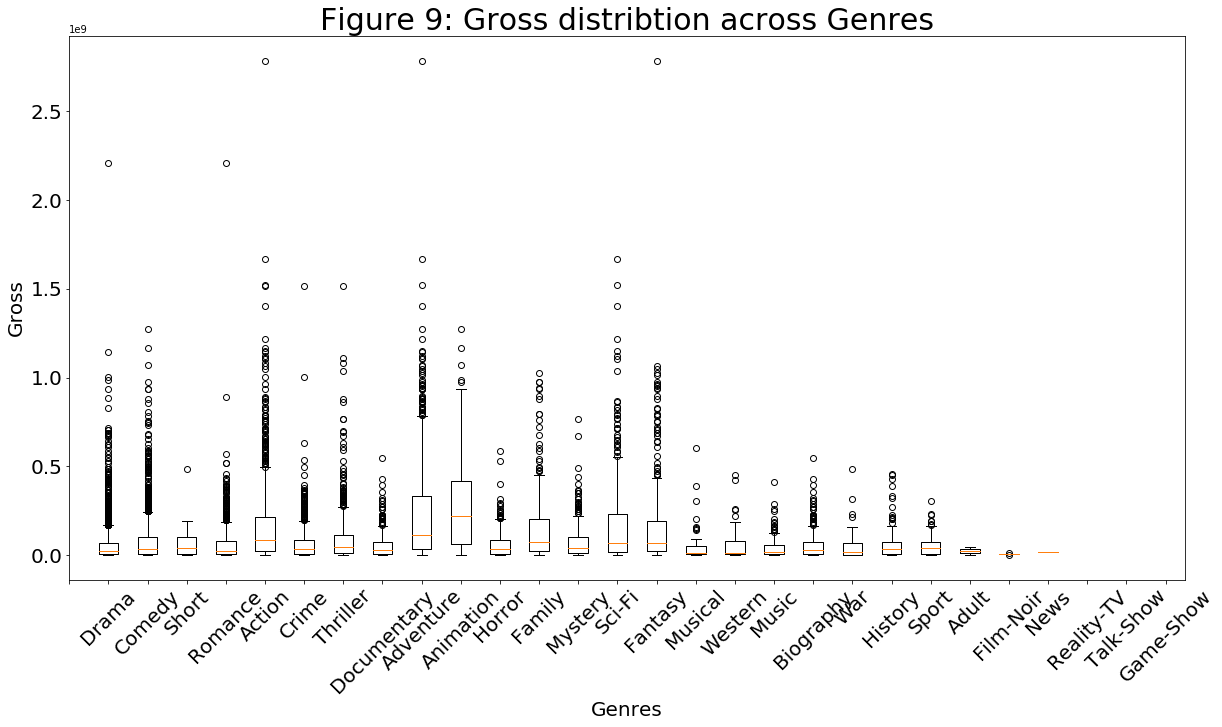

In [26]:
print(len(df['GenreVector'][1])) # to check how many new masks to create
print(G) # to check which order the genres are

# this code will make more masks by referring to the masks from the Gross vs Genres code

m11 = df['GenreVector'].apply(GenreFunc,pos=8) # For Horror 
m12 = df['GenreVector'].apply(GenreFunc,pos=11) # Family
m13 = df['GenreVector'].apply(GenreFunc,pos=16) # Mystery
m14 = df['GenreVector'].apply(GenreFunc,pos=9) # Sci-Fi
m15 = df['GenreVector'].apply(GenreFunc,pos=17) # Fantasy
m16 = df['GenreVector'].apply(GenreFunc,pos=20) # Musical
m17 = df['GenreVector'].apply(GenreFunc,pos=23) # Western
m18 = df['GenreVector'].apply(GenreFunc,pos=15) # For Music
m19 = df['GenreVector'].apply(GenreFunc,pos=1) # Biography
m20 = df['GenreVector'].apply(GenreFunc,pos=6) # War
m21 = df['GenreVector'].apply(GenreFunc,pos=12) # History
m22 = df['GenreVector'].apply(GenreFunc,pos=18) # Sport
m23 = df['GenreVector'].apply(GenreFunc,pos=22) # Adult
m24 = df['GenreVector'].apply(GenreFunc,pos=24) # Film-Noir
m25 = df['GenreVector'].apply(GenreFunc,pos=26) # News
m26 = df['GenreVector'].apply(GenreFunc,pos=25) # Reality TV
m27 = df['GenreVector'].apply(GenreFunc,pos=21) # Talk Show
m28 = df['GenreVector'].apply(GenreFunc,pos=27) # Game Show


Drama = df.Gross[m1] # by doing so we will take the Gross values of the movies bucketed according to the repsective Genre
Comedy = df.Gross[m2]
Short = df.Gross[m3]
Romance = df.Gross[m4]
Action = df.Gross[m5]
Crime = df.Gross[m6]
Thriller = df.Gross[m7]
Documentary = df.Gross[m8]
Adventure = df.Gross[m9]
Animation = df.Gross[m10]
Horror = df.Gross[m11]
Family = df.Gross[m12]
Mystery = df.Gross[m13]
Scifi = df.Gross[m14]
Fantasy = df.Gross[m15]
Musical = df.Gross[m16]
Western = df.Gross[m17]
Music = df.Gross[m18]
Biography = df.Gross[m19]
War = df.Gross[m20]
History = df.Gross[m21]
Sport = df.Gross[m22]
Adult = df.Gross[m23]
Filmnoir = df.Gross[m24]
News = df.Gross[m25]
RealityTV = df.Gross[m26]
Talkshow = df.Gross[m27]
Gameshow = df.Gross[m28]

lyst3 = [Drama.dropna(),Comedy.dropna(),Short.dropna(),Romance.dropna(),Action.dropna(),Crime.dropna(),Thriller.dropna(),Documentary.dropna(),Adventure.dropna(),Animation.dropna(),Horror.dropna(),Family.dropna(),Mystery.dropna(),Scifi.dropna(),Fantasy.dropna(),Musical.dropna(),Western.dropna(),Music.dropna(),Biography.dropna(),War.dropna(),History.dropna(),Sport.dropna(),Adult.dropna(),Filmnoir.dropna(),News.dropna(),RealityTV.dropna(),Talkshow.dropna(),Gameshow.dropna()]


fig, ax = plt.subplots(figsize=(20,10))

ax.boxplot(lyst3)

plt.ylabel('Gross',fontsize=20)

plt.xlabel('Genres',fontsize=20)

plt.yticks(fontsize = 20)

plt.xticks(np.arange(29),('','Drama','Comedy','Short','Romance','Action','Crime','Thriller','Documentary','Adventure','Animation','Horror','Family','Mystery','Sci-Fi','Fantasy', 'Musical', 'Western', 'Music', 'Biography', 'War', 'History', 'Sport', 'Adult', 'Film-Noir', 'News', 'Reality-TV', 'Talk-Show', 'Game-Show'),rotation=45,fontsize=20)

plt.title("Figure 9: Gross distribtion across Genres",fontsize=30)

plt.show()

The Figure 10: Gross Distribution across Genres show that the median Gross values for almost all Genres is similar but the amount of variation in Gross is pretty different.

- Musical, Western, Music, Biography, war, History, Sport, Documentary, Horror and Thriller Genres have very low and similar variation. Drama, Comedy, Short, Romance, Action, Crime, Adventure, Animation and Mystery also have low and similar variation. 

- On the other hand, Family, Sci-Fi and Fantasy movies have high and similar variation in Gross revenue and Adult, Fim-Noir and News have extremely low and similar variation in Gross. 

- The Genres Reality TV, Talk Show and Game Show have very low data to the point where its negligable and is therefore given no boxplots

Question: Did you find any observable relationships or combinations of Budget/Runtime/Genre that result in high Gross revenue? If you divided the movies into different subsets, you may get different answers for them - point out interesting ones.

Answer: 
- It seems from Figure 7: Gross vs Buget and Figures 8 and 9: Shorter Runtime vs. Gross and Longer Runtime vs. Gross respectively that there is no direct clear relationship between Budget and Gross nor Runtim and Gross. 

- Most movies’ budget falls below 50000000 and Gross below 200000000

- Most movies’ runtime falls between 75 and 150 minutes

- Within this budget range and runtime range, there is no clear correlation between Budget and Gross nor Runtim and Gross.

- It seems from Figure 10: Gross Distribution across Genres that Romance, Documentary and Fantasy genres have the highest median gross and on the other hand Film-Noir, Adult and Sport genres have the lowest median gross

### Task 6: Process Awards Column

The variable Awards describes nominations and awards in text format. Convert it to 2 numeric columns, the first capturing the number of wins, and the second capturing nominations. Replace the Awards column with these new columns, and then study the relationship of Gross revenue with respect to them.
Note that the format of the Awards column is not standard; you may have to use regular expressions to find the relevant values. Try your best to process them, and you may leave the ones that don’t have enough information as NAs or set them to 0s.

In [28]:
# Creating 2 new Columns, Wins and Nominations
df=df.join(pd.DataFrame({'Wins':[np.nan]*34903,'Nominations':[np.nan]*34903}))
df

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,BoxOffice,Production,Website,Response,Budget,Domestic_Gross,Gross,Date,Wins,Nominations
0,1,39 Pounds of Love,2005,UNRATED,2005-04-08,70 min,"Documentary, Biography, Romance",Dani Menkin,"Ilan Heitner, Dani Menkin",Ami Ankilewitz,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3:am,2005,NOT RATED,2005-01-25,21 min,"Short, Thriller",Ryan Bradford,"Ryan Bradford, Ryen Schlegel","Mike Ashworth, Jen Badewitz, Ryan Bradford, Se...",...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2,3,500 Years Later,2005,NaN,2005-02-24,106 min,Documentary,Owen Alik Shahadah,M.K. Asante,"Kolfi Adu, Sona Jobarteh, Hunter Adams III, Ha...",...,NaN,Codeblack TV,http://www.500yearslater.com/,True,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5th World,2005,NaN,2005-01-20,75 min,"Drama, Romance",Blackhorse Lowe,Blackhorse Lowe,"Livandrea Knoki, Sheldon Silentwalker, Ernest ...",...,NaN,NaN,http://www.variety.com/review/VE1117926147.htm...,True,NaN,NaN,NaN,NaN,NaN,NaN
4,5,90,2005,NaN,2005-03-12,14 min,"War, Short",Jason Wise,Jason Wise,"Bryan Barnett-Woods, Oto Brezina, Mike Dunn, E...",...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Abel Raises Cain,2005,NaN,2005-01-23,82 min,"Documentary, Biography","Jenny Abel, Jeff Hockett","Jenny Abel, Jeff Hockett","Alan Abel, Jeanne Abel, Frank Murgalo, Jenny Abel",...,NaN,Powderhouse Productions,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Acne,2000,NaN,2005-06-03,65 min,"Comedy, Horror, Sci-Fi",Rusty Nails,Rusty Nails,"Tracey Hayes, Rusty Nails, Jim Darley, Mary Lu...",...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
7,8,One Senseless Act: The Khamisa Story,1999,NaN,NaN,NaN,Documentary,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Akoibon,2005,NaN,2005-04-13,95 min,"Comedy, Adventure, Romance",Edouard Baer,Edouard Baer,"Jean Rochefort, Nader Boussandel, Marie Denarn...",...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Alien Abduction,2014,NOT RATED,2014-05-01,85 min,"Horror, Sci-Fi, Thriller",Matty Beckerman,Robert Lewis,"Katherine Sigismund, Corey Eid, Riley Polanski...",...,NaN,IFC Films,http://www.alienabductionfilm.com/,True,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# NaN value rows are given Nan values in Wins and Nominations columns 

# Rows with only either wins or nominations have the other column as 0

# re patterns for the nominations and awards   


for i in range(34903):
    
    if df['Awards'][i] == np.nan: # for NaN values
        continue
        
    A = str(df['Awards'][i])
    if A.lower() == "nan":
        continue
    
    XWins = re.match(r"(\d+)\s*[wW]\w*",A)  # will match any string in format of x wins
    YNominations = re.match(r"\d+\s*[nN]\w*",A) # will match any string in format of y nominations
    XWinsYNominations = re.match(r"\d+\s*[wW]\w*\s*[&]\s*\d+\s*[nN]\w*",A) # will match any string in the format of x wins y nominations
    Type4 = re.match(r"[nN]\w+\s+\w+\s*(\d+)\s*\w*\s*\w*\s*\w*\s*[.]*\s*\w+\s*(\d+)\s*[wW]\w*\s*[&]\s*(\d+)\s*[nN]\w*",A) # will match any string which goes as "Nominated for <award name> ". x wins and y nominations
    Type5 = re.match(r"[wW]\w+\s*(\d+)\s*\w*\s*\w*\s*\w*\s*[.]*\s*\w+\s*(\d+)\s*[wW]\w*\s*[&]\s*(\d+)\s*[nN]\w*", A) # will match any string which goes as "Won n <award name> "". x wins and y nominations
    Type6 = re.match(r"[nN]\w+\s+\w*\s*(\d+)\s*\w*\s*\w*\s*\w*\s*[.]*\s*\w+\s*(\d+)\s*[nN]\w*\s*",A) # will match any string which goes as "Nominated for <award name>". y nominations
    Type7 = re.match(r"[nN]\w+\s+\w*\s*(\d+)\s*\w*\s*\w*\s*\w*\s*[.]*\s*\w+\s*(\d+)\s*[wW]\w*\s*",A) # will match any string which goes as "Nominated for  <award name>". x wins
    Type8 = re.match(r"[wW]\w+\s*(\d+)\s*\w*\s*\w*\s*\w*\s*[.]*\s*\w+\s*(\d+)\s*[nN]\w*\s*",A) # will match any string which goes as "Won <award name>". y Nominations
    Type9 = re.match(r"[wW]\w+\s*(\d+)\s*\w*\s*\w*\s*\w*\s*[.]*\s*\w+\s*(\d+)\s*[wW]\w*\s*",A) # will match any string which goes as "Won <award name>". x wins
    
    
    if XWins:
        df.Wins[i] = int(XWins.groups()[0])
        df.Nominations[i] = 0
            
    elif(YNominations):
        if YNominations:
            df.Wins[i] = 0
            df.Nominations[i] = int(YNominations.groups()[0])
            
    elif (XWinsYNominations):
        if XWinsYNominations:
            df.Wins[i] = int(XWinsYNominations.groups()[0])
            df.Nominations[i] = int(XWinsYNominations.groups()[1])
            
    elif(Type4):
        if Type4:
            df.Wins[i] = int(Type4.groups()[1])
            df.Nominations[i] = int(Type4.groups()[0]) + int(Type4.groups()[2])
            
    elif(Type5):
        if Type5:
            df.Wins[i] = int(Type5.groups()[0]) + int(Type5.groups()[1])
            df.Nominations[i] = int(Type5.groups()[2])
            
    elif(Type6):
        if Type6:
            df.Wins[i] = 0
            df.Nominations[i] = int(Type6.groups()[0]) + int(Type6.groups()[1])
            
    elif(Type7):
        if Type7:
            df.Wins[i] = int(Type7.groups()[1])
            df.Nominations[i] = int(Type7.groups()[0])
            

    elif(Type8):
        if Type8:
            df.Wins[i] = int(Type8.groups()[0])
            df.Nominations[i] = int(Type8.groups()[1])
            
    elif(Type9):
        if Type9:
            df.Wins[i] = int(Type9.groups()[0]) + int(Type9.groups()[1])
            df.Nominations[i] = 0
            
    else:
        print(A,i)

        
print(XWins.groups)

C:\Users\sushma\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sushma\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sushma\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


IndexError: tuple index out of range

Question: How did you construct your conversion mechanism? How many rows had valid/non-zero wins or nominations?

Answer: After analyzing the raw data, it was easy to use regular expressions to match certain string and did so for all such possibilities which were 9 such different type of strings thus used the pattern matches to find the no of win and nominaitions

### Task 7: Movie ratings from IMDb and Rotten Tomatoes

There are several variables that describe ratings, including IMDb ratings (imdbRating represents average user ratings and imdbVotes represents the number of user ratings), and multiple Rotten Tomatoes ratings (represented by several variables pre-fixed by tomato). Read up on such ratings on the web (for example
rottentomatoes.com/about and www.imdb.com/help/show_leaf?votestopfaq). Investigate the pairwise relationships between these different descriptors using graphs.

In [35]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34903 entries, 0 to 34902
Data columns (total 42 columns):
Unnamed: 0           34903 non-null int64
Title                34903 non-null object
Year                 34903 non-null int64
Rated                17170 non-null object
Released             29954 non-null object
Runtime              34169 non-null float64
Director             34357 non-null object
Writer               31367 non-null object
Actors               33473 non-null object
Plot                 28650 non-null object
Language             33342 non-null object
Country              34353 non-null object
Awards               12256 non-null object
Poster               23030 non-null object
Metascore            4627 non-null float64
imdbRating           33780 non-null float64
imdbVotes            33746 non-null float64
imdbID               34903 non-null object
Type                 34903 non-null object
tomatoMeter          8101 non-null float64
tomatoImage          8094 non-

In [36]:
print(df['Metascore'])
print(df['imdbRating'])
print(df['imdbVotes'])
print(df['tomatoMeter'])
print(df['tomatoImage'])
print(df['tomatoRating'])
print(df['tomatoReviews'])
print(df['tomatoFresh'])
print(df['tomatoRotten'])
print(df['tomatoConsensus'])
print(df['tomatoUserMeter'])
print(df['tomatoUserRating'])
print(df['tomatoUserReviews'])
print(df['tomatoURL'])

0        56.0
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8        47.0
9        71.0
10        NaN
11        9.0
12        NaN
13        NaN
14        NaN
15        NaN
16       54.0
17        NaN
18        NaN
19       27.0
20       54.0
21        NaN
22        NaN
23        NaN
24       37.0
25       53.0
26       54.0
27        NaN
28       21.0
29        NaN
         ... 
34873    96.0
34874     NaN
34875     NaN
34876     NaN
34877     NaN
34878     NaN
34879     NaN
34880     NaN
34881     NaN
34882     NaN
34883     NaN
34884     NaN
34885     NaN
34886     NaN
34887     NaN
34888     NaN
34889     NaN
34890     NaN
34891     NaN
34892     NaN
34893     NaN
34894     NaN
34895     NaN
34896     NaN
34897     NaN
34898     NaN
34899     NaN
34900     NaN
34901     NaN
34902     NaN
Name: Metascore, Length: 34903, dtype: float64
0        6.8
1        8.2
2        7.0
3        6.4
4        8.3
5        7.5
6        NaN
7       

Text(0.5, 1.0, 'Figure 10: Metascore vs Tomatometer')

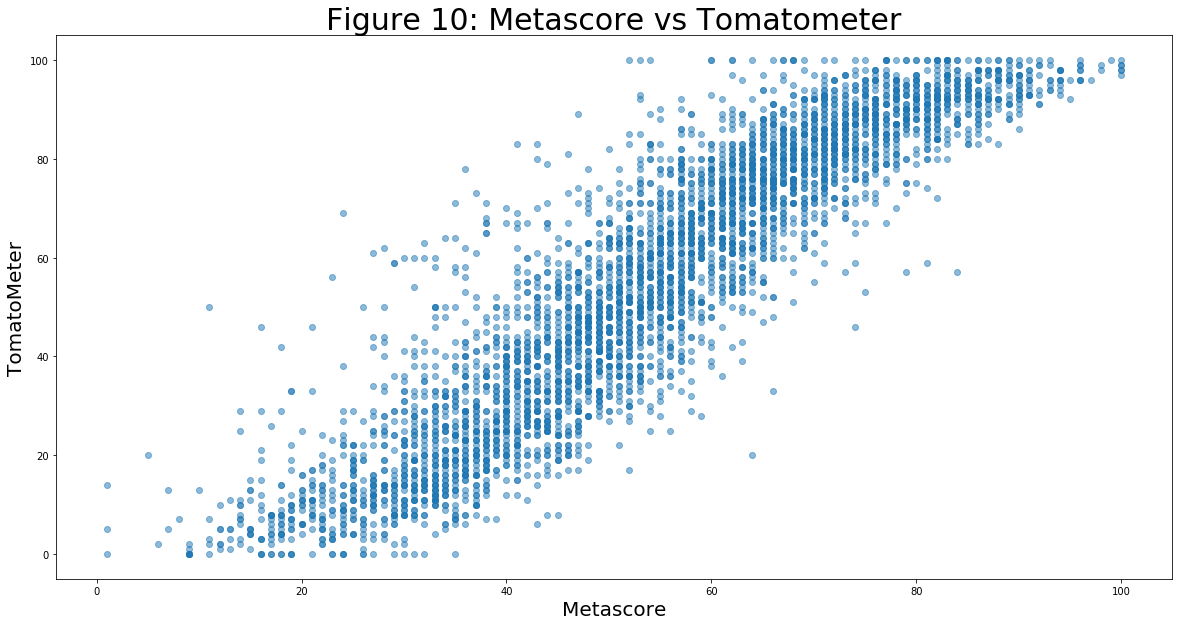

In [37]:
ImdbTomato = df[(df.Metascore>=0) & (df.tomatoMeter>=0)] #this will find the relation between the Metascore value (critic rating from IMDB) and the Tomatometer values (critic ratings from Rotten tomatoes)

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus', 'tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins','Nominations']

ImdbTomato = ImdbTomato.drop(Columns,axis=1)

plt.scatter(x = ImdbTomato.Metascore,y = ImdbTomato.tomatoMeter,alpha=0.5)

plt.ylabel('TomatoMeter',fontsize=20)

plt.xlabel('Metascore',fontsize=20)

plt.title("Figure 10: Metascore vs Tomatometer",fontsize=30)


Text(0.5, 1.0, 'Figure 11: User IMDB Rating vs User Rotten Tomatoes Rating')

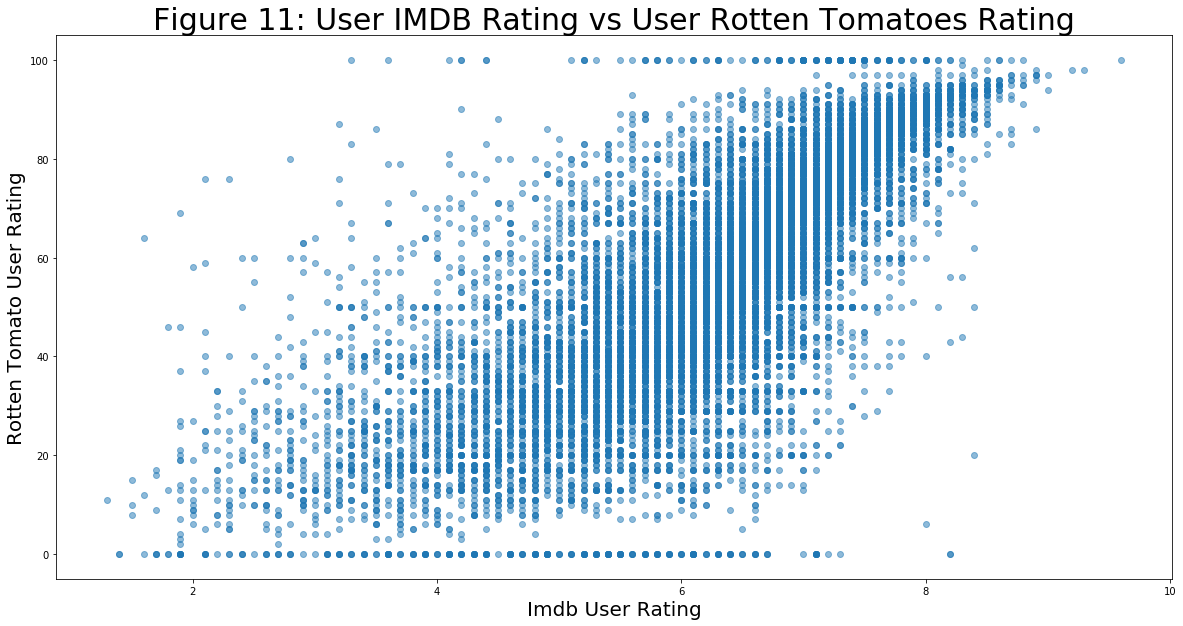

In [41]:
UserImdbUserTom=df[(df.imdbRating>=0) & (df.tomatoUserMeter>=0)]  #this will find the relation between the user rating from IMDB and the user rating from Rotten Tomatoes

Columns =['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore', 'imdbVotes', 'imdbID', 'Type', 'tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins','Nominations']

UserImdbUserTom = UserImdbUserTom.drop(Columns,axis=1)

plt.scatter(x = UserImdbUserTom.imdbRating,y = UserImdbUserTom.tomatoUserMeter,alpha=0.5)

plt.ylabel('Rotten Tomato User Rating',fontsize=20)

plt.xlabel('Imdb User Rating',fontsize=20)

plt.title("Figure 11: User IMDB Rating vs User Rotten Tomatoes Rating",fontsize=30)

Text(0.5, 1.0, 'Figure 12: Tomatometer vs User Rating - Rotten Tomatoes ')

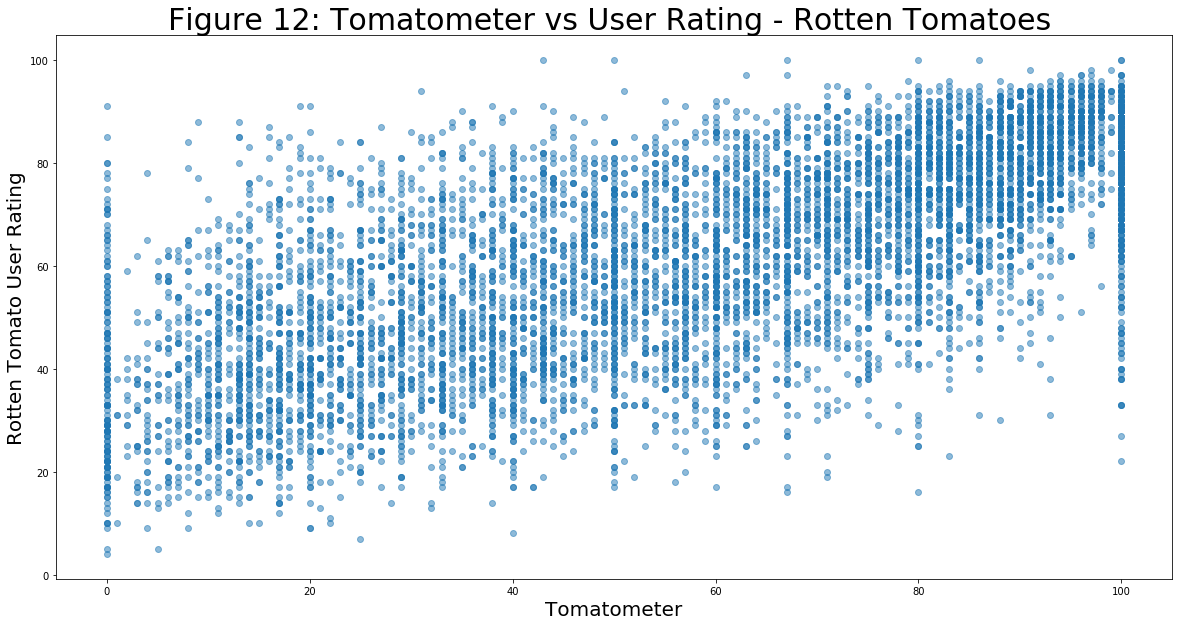

In [56]:
TomatoUserCritic = df[(df.tomatoMeter>=0) & (df.tomatoUserMeter>=0)]  #this will find the relation between the user rating from Rotten Tomatoes and the Tomatometer (critic rating from Rotten Tomatoes)

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbRating','imdbVotes', 'imdbID', 'Type', 'tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins','Nominations']

TomatoUserCritic = TomatoUserCritic.drop(Columns,axis=1)

plt.scatter(x = TomatoUserCritic.tomatoMeter,y = TomatoUserCritic.tomatoUserMeter,alpha=0.5)

plt.ylabel('Rotten Tomato User Rating',fontsize=20)

plt.xlabel('Tomatometer',fontsize=20)

plt.title("Figure 12: Tomatometer vs User Rating - Rotten Tomatoes ",fontsize=30)

Text(0.5, 1.0, 'Figure 13: Metascore vs User Rating - IMDB ')

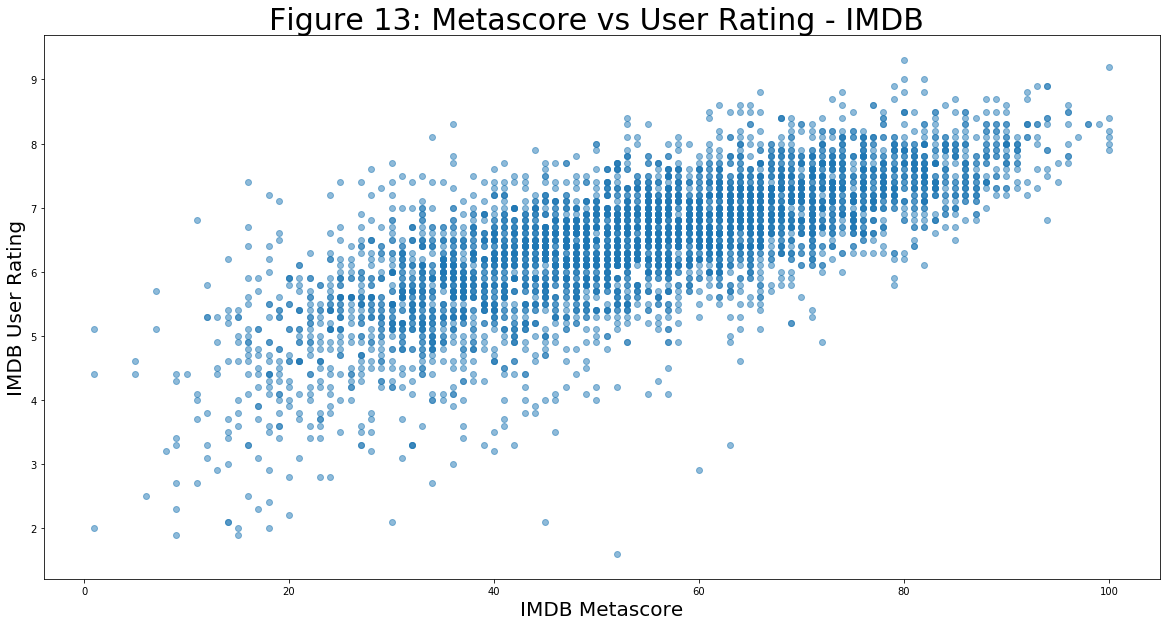

In [54]:
ImdbCriticUser = df[(df.Metascore>=0) & (df.imdbRating>=0)] #this will find the relation between the user rating from IMDB and the Metascore (critic rating from IMDB)

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','imdbVotes', 'imdbID', 'Type', 'tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins','Nominations']

ImdbCriticUser = ImdbCriticUser.drop(Columns,axis=1)

plt.scatter(x = ImdbCriticUser.Metascore,y = ImdbCriticUser.imdbRating,alpha=0.5)

plt.ylabel('IMDB User Rating',fontsize=20)

plt.xlabel('IMDB Metascore',fontsize=20)

plt.title("Figure 13: Metascore vs User Rating - IMDB ",fontsize=30)

Text(0.5, 1.0, 'Figure 14: Tomatometer vs IMDB User Rating ')

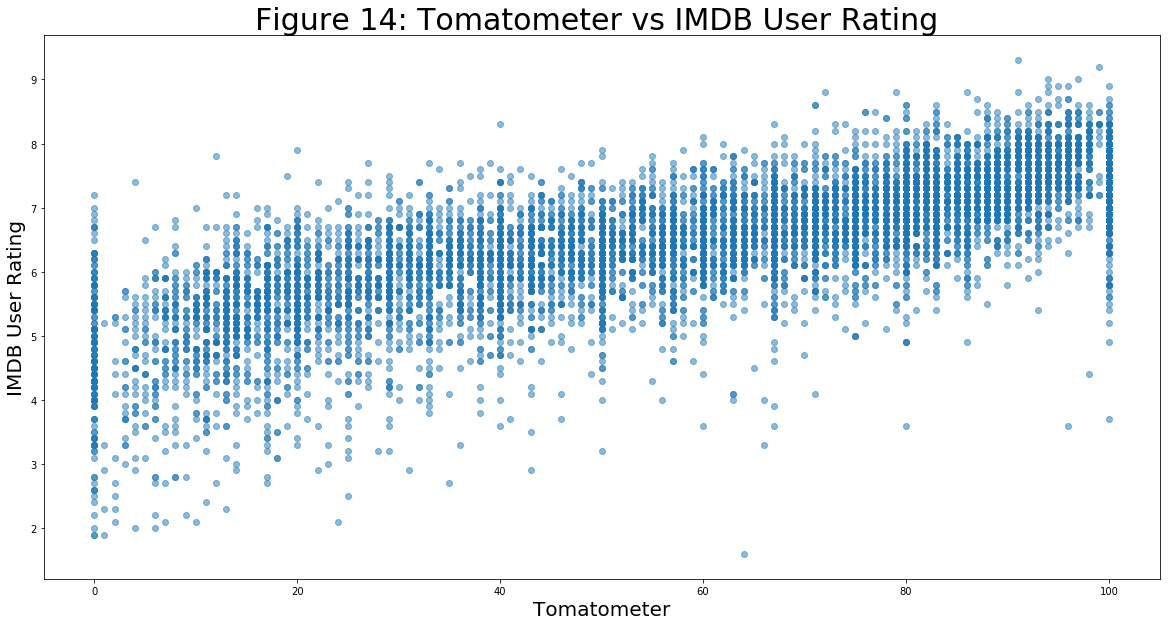

In [50]:
CriticRottenImdbUser=df[(df.tomatoMeter>=0) & (df.imdbRating>=0)] #this will find the relation between the user rating from IMDB and the Tomatometer (critic rating from Rotten Tomatoes)

Columns =['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbVotes', 'imdbID', 'Type','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins','Nominations']

CriticRottenImdbUser = CriticRottenImdbUser.drop(Columns,axis=1)

plt.scatter(x = CriticRottenImdbUser.tomatoMeter, y = CriticRottenImdbUser.imdbRating,alpha=0.5)

plt.ylabel('IMDB User Rating',fontsize=20)

plt.xlabel('Tomatometer',fontsize=20)

plt.title("Figure 14: Tomatometer vs IMDB User Rating ",fontsize=30)

Text(0.5, 1.0, 'Figure 15: Metascore vs Rotten Tomatoes User Rating ')

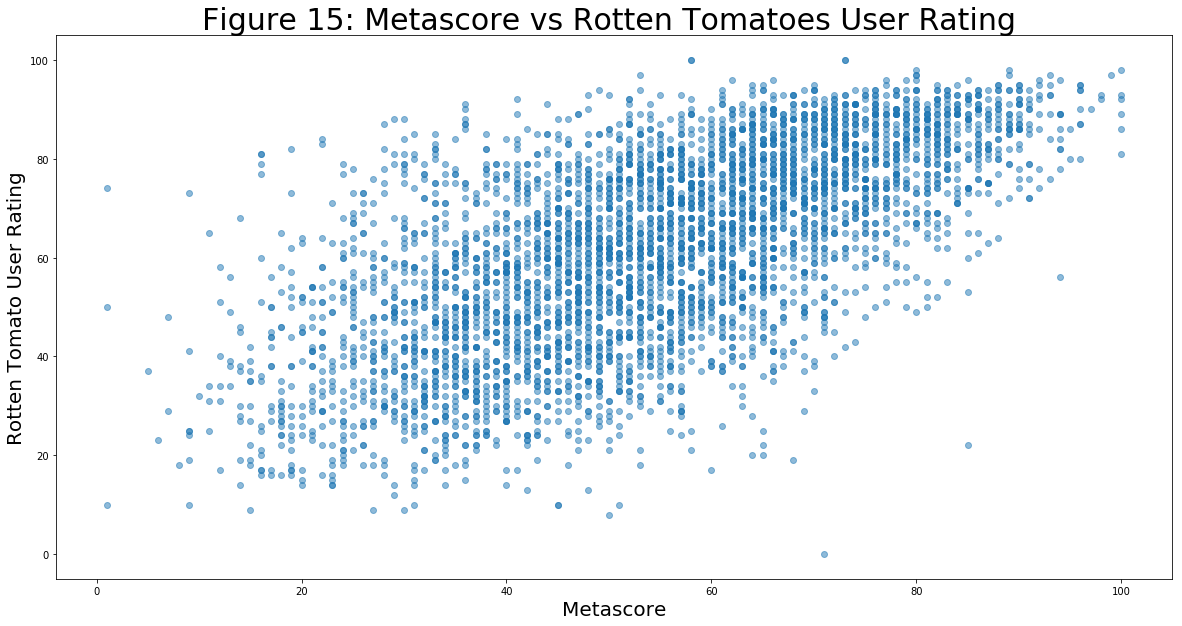

In [84]:
MetascoreRottenUser = df[(df.Metascore>=0) & (df.tomatoUserMeter>=0)] #this will find the relation between the user rating from Rotten Tomatoes and the Metascore (critic rating from IMDB)

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','imdbRating','imdbVotes', 'imdbID', 'Type', 'tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins','Nominations']

MetascoreRottenUser = MetascoreRottenUser.drop(Columns,axis=1)

plt.scatter(x = MetascoreRottenUser.Metascore,y = MetascoreRottenUser.tomatoUserMeter,alpha=0.5)

plt.ylabel('Rotten Tomato User Rating',fontsize=20)

plt.xlabel('Metascore',fontsize=20)

plt.title("Figure 15: Metascore vs Rotten Tomatoes User Rating ",fontsize=30)


Question: Comment on the similarities and differences between the user ratings of IMDb and the critics ratings of Rotten Tomatoes.

Answer: From Figure 14 it can be seen that there is a strong postive correlation between the Tomatometer (critic ratings for Rotten Tomatoes) and IMDB User ratings

### Task 8: Ratings and awards

These ratings typically reflect the general appeal of the movie to the public or gather opinions from a larger body of critics. Whereas awards are given by professional societies that may evaluate a movie on specific attributes, such as artistic performance, screenplay, sound design, etc.
Study the relationship between ratings and awards using graphs (awards here refers to wins and/or nomina- tions).

Text(0.5, 1.0, 'Figure 16: Tomatometer vs Wins ')

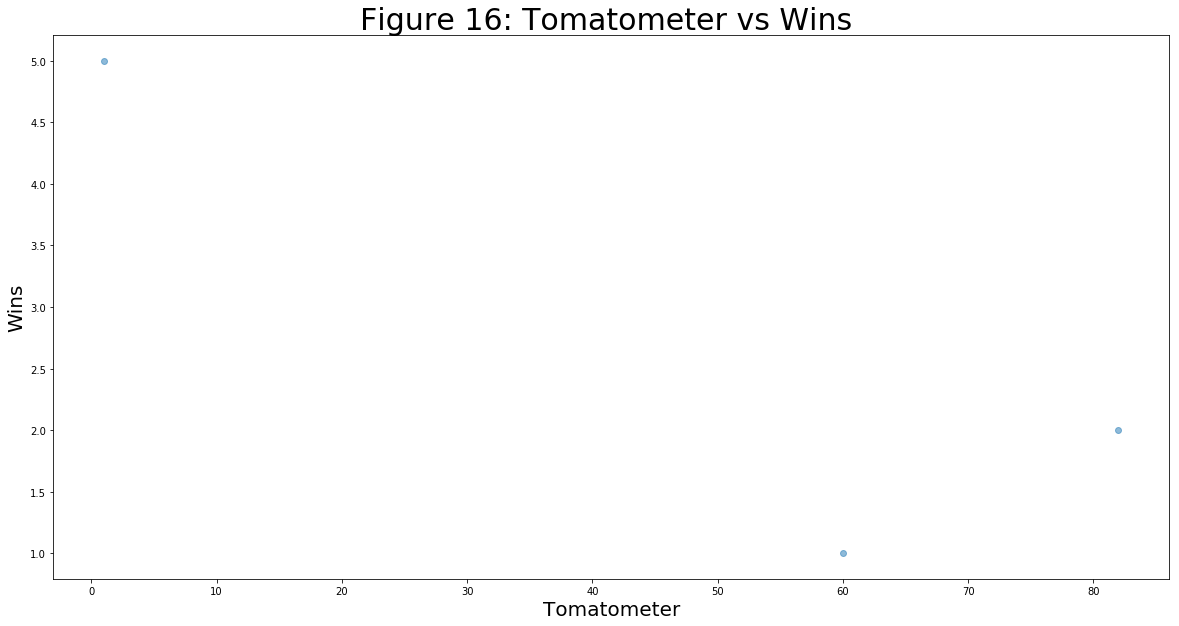

In [90]:
TomatometerWins = df[(df.tomatoMeter>=0) & (df.Wins>=0)] # finds relation between Tomatometer (critic rating from Rotten Tomatoes) and Wins

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbRating','imdbVotes', 'imdbID', 'Type', 'tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Nominations']

TomatometerWins = TomatometerWins.drop(Columns,axis=1)

plt.scatter(x = TomatometerWins.tomatoMeter,y = TomatometerWins.Wins,alpha=0.5)

plt.ylabel('Wins',fontsize=20)

plt.xlabel('Tomatometer',fontsize=20)

plt.title("Figure 16: Tomatometer vs Wins ",fontsize=30)

Text(0.5, 1.0, 'Figure 17: Tomatometer vs Nominations ')

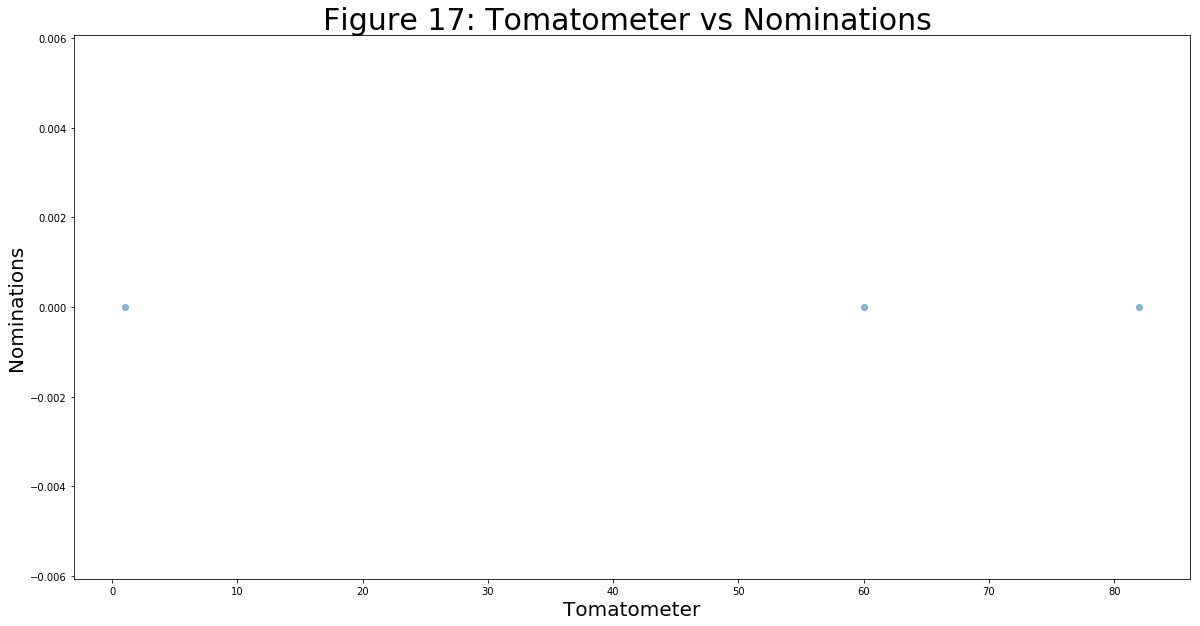

In [91]:
TomatometerNomin = df[(df.tomatoMeter>=0) & (df.Nominations>=0)] # finds relation between Tomatometer (critic rating from Rotten Tomatoes) and Nominations

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbRating','imdbVotes', 'imdbID', 'Type','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins']

TomatometerNomin = TomatometerNomin.drop(Columns,axis=1)

plt.scatter(x = TomatometerNomin.tomatoMeter,y = TomatometerNomin.Nominations,alpha=0.5)

plt.ylabel('Nominations',fontsize=20)

plt.xlabel('Tomatometer',fontsize=20)

plt.title("Figure 17: Tomatometer vs Nominations ",fontsize=30)

Text(0.5, 1.0, 'Figure 18: Rotten Tomatoes User Ratings vs Wins ')

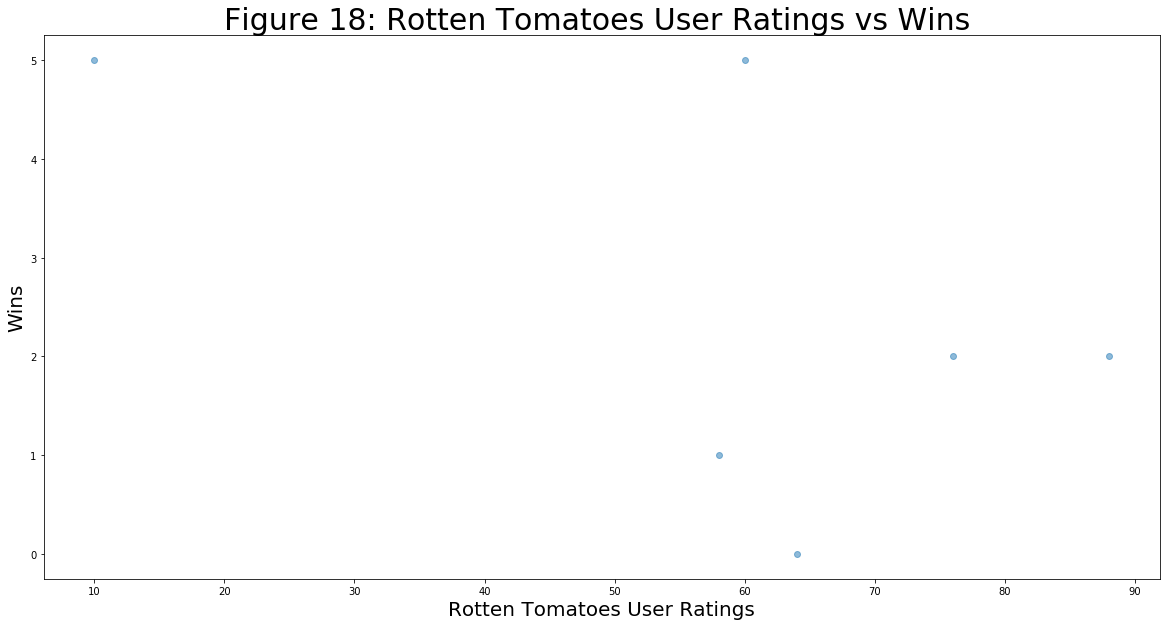

In [92]:
RottenUserWins = df[(df.tomatoUserMeter>=0) & (df.Wins>=0)] # finds relation between user rating from Rotten Tomatoes and Wins

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbRating','imdbVotes', 'imdbID', 'Type','tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Nominations']

RottenUserWins = RottenUserWins.drop(Columns,axis=1)

plt.scatter(x = RottenUserWins.tomatoUserMeter,y = RottenUserWins.Wins,alpha=0.5)

plt.ylabel('Wins',fontsize=20)

plt.xlabel('Rotten Tomatoes User Ratings',fontsize=20)

plt.title("Figure 18: Rotten Tomatoes User Ratings vs Wins ",fontsize=30)

Text(0.5, 1.0, 'Figure 19: Rotten Tomatoes User Ratings vs Nominations ')

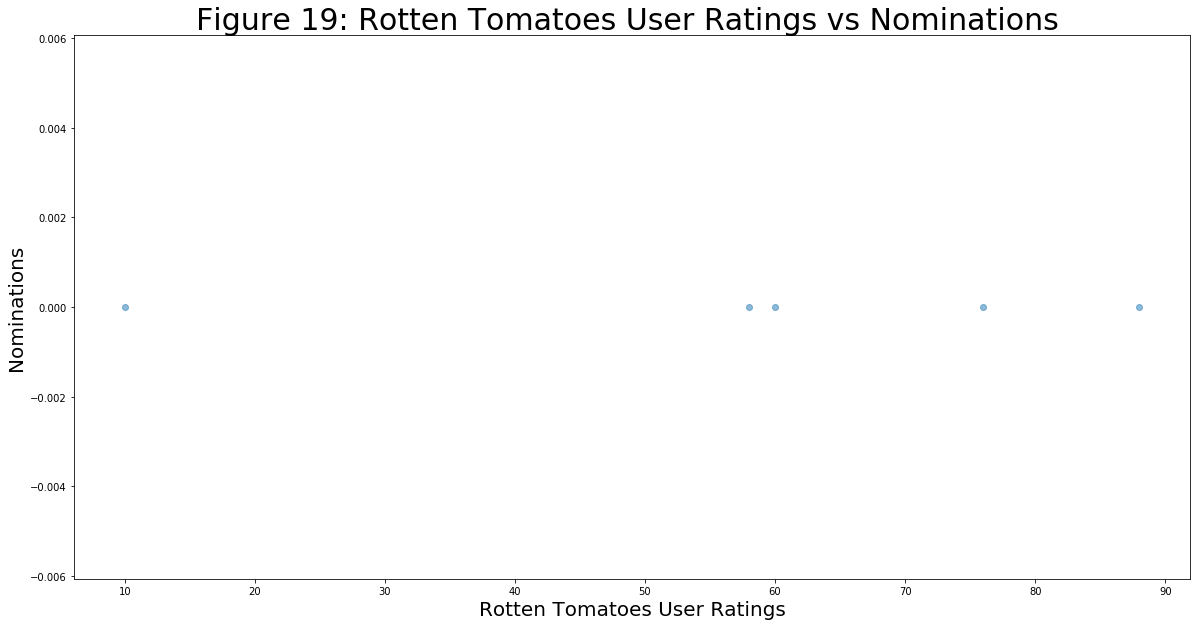

In [93]:
RottenUserNomin = df[(df.tomatoUserMeter>=0) & (df.Nominations>=0)] # finds relation between user rating from Rotten Tomatoes and Nominations

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbRating','imdbVotes', 'imdbID', 'Type','tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins']

RottenUserNomin = RottenUserNomin.drop(Columns,axis=1)

plt.scatter(x = RottenUserNomin.tomatoUserMeter,y = RottenUserNomin.Nominations,alpha=0.5)

plt.ylabel('Nominations',fontsize=20)

plt.xlabel('Rotten Tomatoes User Ratings',fontsize=20)

plt.title("Figure 19: Rotten Tomatoes User Ratings vs Nominations ",fontsize=30)

Text(0.5, 1.0, 'Figure 20: Metascore vs Wins ')

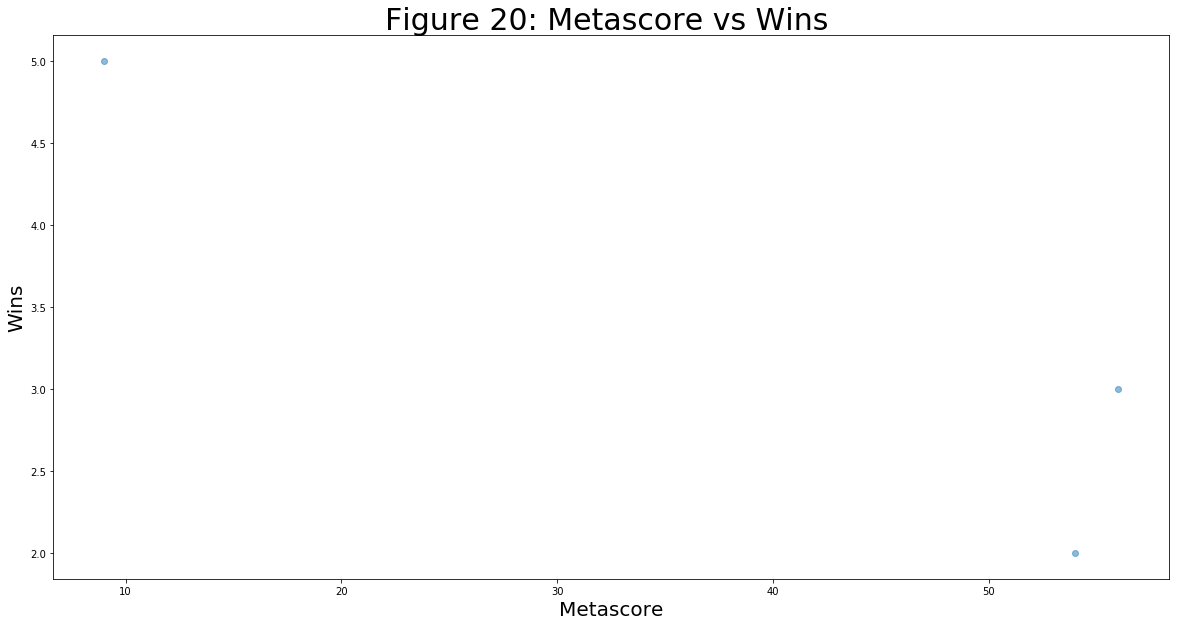

In [94]:
MetascoreWins = df[(df.Metascore>=0) & (df.Wins>=0)] # finds relation between Metascore (IMDB critic rating) and Wins

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','imdbRating','imdbVotes', 'imdbID', 'Type', 'tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Nominations']

MetascoreWins = MetascoreWins.drop(Columns,axis=1)

plt.scatter(x = MetascoreWins.Metascore,y = MetascoreWins.Wins,alpha=0.5,)

plt.ylabel('Wins',fontsize=20)

plt.xlabel('Metascore',fontsize=20)

plt.title("Figure 20: Metascore vs Wins ",fontsize=30)


Text(0.5, 1.0, 'Figure 21: Metascore vs Nominations ')

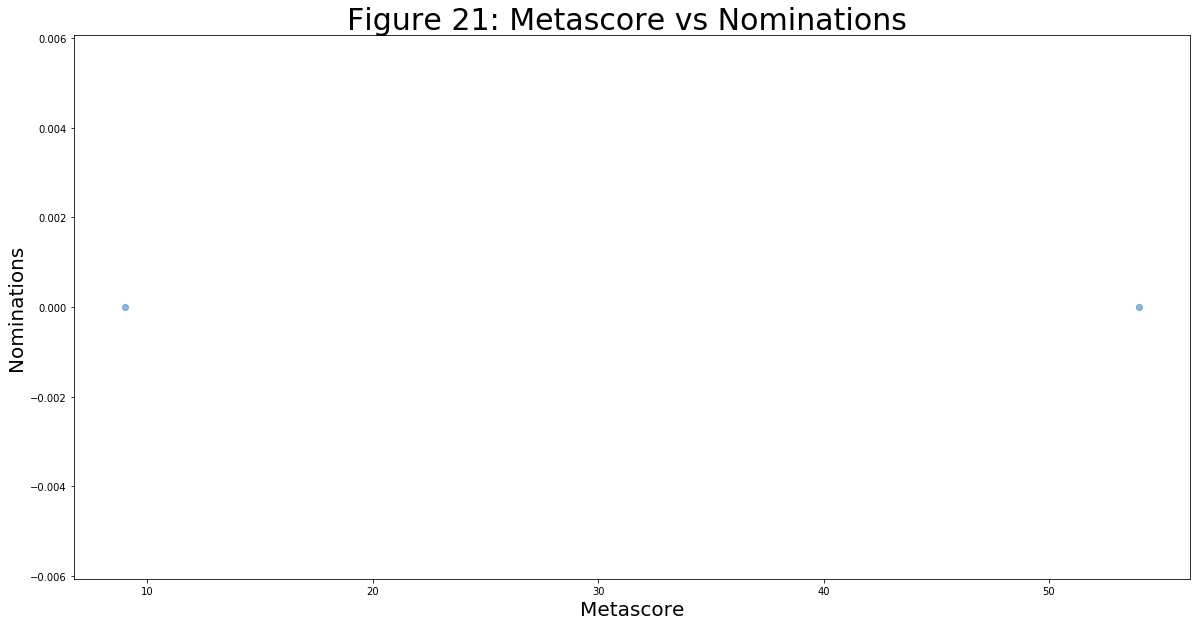

In [95]:
MetascoreNomin = df[(df.tomatoMeter>=0) & (df.Wins>=0)] #finds relation between Metascore (IMDB critic rating) and Nominations

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','imdbRating','imdbVotes', 'imdbID', 'Type', 'tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins']

MetascoreNomin = MetascoreNomin.drop(Columns,axis=1)

plt.scatter(x = MetascoreNomin.Metascore,y = MetascoreNomin.Nominations,alpha=0.5)

plt.ylabel('Nominations',fontsize=20)

plt.xlabel('Metascore',fontsize=20)

plt.title("Figure 21: Metascore vs Nominations ",fontsize=30)

In [26]:
ImdbUserWins = df[(df.imdbRating>=0) & (df.Wins>=0)] #finds relation between IMDB user rating and Wins

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbVotes', 'imdbID', 'Type','tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Nominations']

ImdbUserWins = ImdbUserWins.drop(Columns,axis=1)

plt.scatter(x = ImdbUserWins.imdbRating,y = ImdbUserWins.Wins,alpha=0.5)

plt.ylabel('Wins',fontsize=20)

plt.xlabel('IMDB User Ratings',fontsize=20)

plt.title("Figure 22: IMDB User Ratings vs Wins ",fontsize=30)

AttributeError: 'DataFrame' object has no attribute 'Wins'

Text(0.5, 1.0, 'Figure 23: IMDB User Ratings vs Nominations ')

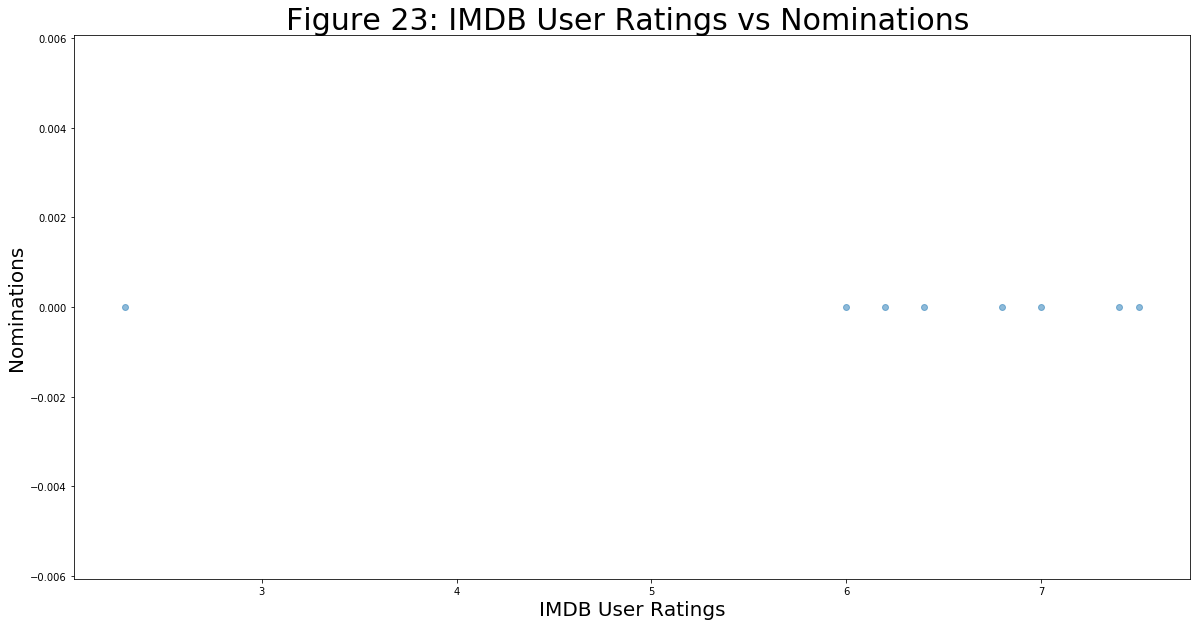

In [97]:
ImdbUserNomin = df[(df.imdbRating>=0) & (df.Nominations>=0)] #finds relation between IMDB user rating and Nominations

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbVotes', 'imdbID', 'Type','tomatoMeter','tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserMeter','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'Budget','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins']

ImdbUserNomin = ImdbUserNomin.drop(Columns,axis=1)

plt.scatter(x = ImdbUserNomin.imdbRating, y = ImdbUserNomin.Nominations,alpha=0.5)

plt.ylabel('Nominations',fontsize=20)

plt.xlabel('IMDB User Ratings',fontsize=20)

plt.title("Figure 23: IMDB User Ratings vs Nominations ",fontsize=30)

Q: How good are these ratings in terms of predicting the success of a movie in winning awards or nominations? Is there a high correlation between two variables?

Answer: 
- From Figure 16,18,20,22 it can be seen that there is weak postive correlation between the ratings and wins 

- Figure 17,19,21,23 it can be seen that there hardly any correlation which is almost negligable. 

- Thus the ratings may slightly help predicting wins  

- But the ratings cannot help predict nominations

### Task 9. Expected insights
Come up with two new insights (backed up by data and graphs) that is expected. Here “new” means insights that are not an immediate consequence of one of the above tasks. You may use any of the columns already explored above or a different one in the dataset, such as Title, Actors, etc.

In [10]:
df.Language

0                English, Hebrew, Spanish
1                                 English
2                                 English
3                         English, Navajo
4                         English, German
5                                 English
6                                 English
7                                 English
8                                  French
9                                 English
10                                English
11                                English
12                                English
13                              Norwegian
14                                 German
15                                English
16                                English
17       Bengali, English, Hindi, Panjabi
18                                English
19               English, Russian, French
20                                English
21                       English, Spanish
22                       English, Serbian
23                                

In [15]:
l = {} 
def LanguageCount(a):
    if type(a) == float:
        return
    L = a.split(',')
    for i in range(len(L)):
        L[i] = L[i].strip()
    for i in L:
        if i in l.keys():
            l[i]+=1
        else:
            l[i]=1
df.Language.apply(LanguageCount)
l



{'English': 30302,
 'Hebrew': 229,
 'Spanish': 1833,
 'Navajo': 7,
 'German': 1737,
 'French': 2415,
 'Norwegian': 171,
 'Bengali': 47,
 'Hindi': 562,
 'Panjabi': 25,
 'Russian': 947,
 'Serbian': 61,
 'Arabic': 233,
 'Filipino': 111,
 'Tagalog': 110,
 'Tamil': 58,
 'Thai': 62,
 'Japanese': 880,
 'Portuguese': 379,
 'Mandarin': 342,
 'Cantonese': 347,
 'Cree': 4,
 'Greek': 169,
 'Turkish': 129,
 'Italian': 1299,
 'Latin': 141,
 'Dutch': 357,
 'Yiddish': 60,
 'Danish': 316,
 'Hungarian': 123,
 'Gallegan': 7,
 'Swedish': 356,
 'Vietnamese': 50,
 'Hokkien': 8,
 'Malay': 21,
 'Wolof': 16,
 'Bulgarian': 104,
 'Korean': 203,
 'Polish': 389,
 'Persian': 94,
 'None': 54,
 'Hawaiian': 11,
 'Finnish': 182,
 'Indonesian': 41,
 'Telugu': 53,
 'Ancient (to 1453)': 5,
 'Croatian': 37,
 'Ukrainian': 50,
 'Min Nan': 9,
 'Esperanto': 5,
 'Mende': 2,
 'Afrikaans': 42,
 'Maori': 10,
 'Pushto': 10,
 'Xhosa': 9,
 'Malayalam': 42,
 'Romanian': 83,
 'Swahili': 24,
 'American Sign Language': 37,
 'British Sign

In [17]:
l['Others']=0
b = list(l.keys())
for i in b:
    if l[i] < 700:
        l['Others'] += l[i]
        del l[i]
l

{'English': 30302,
 'Spanish': 1833,
 'German': 1737,
 'French': 2415,
 'Russian': 947,
 'Japanese': 880,
 'Italian': 1299,
 'Others': 7108}

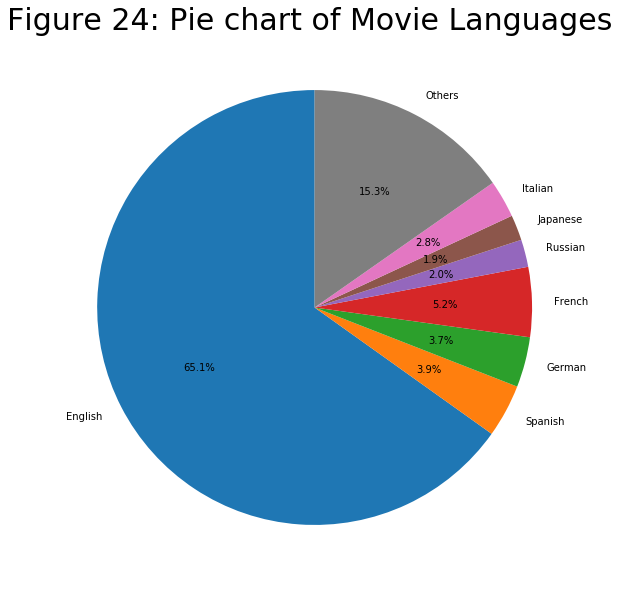

In [23]:
fig,ax=plt.subplots(figsize=(20,10))

ax.pie(list(l.values()),labels=list(l.keys()),startangle=90,autopct='%1.1f%%')

plt.title("Figure 24: Pie chart of Movie Languages ",fontsize=30)

plt.show()


Answer: From the above Figure 24 it can be analyzed that majority movies released are majorly in English. This is a very anticipated result as it is of common knowledge that the Hollywood Industry mass produces movies every year and is one of the highest grossing markets in the world as of now and has been for a very long time. Currently other movie industries are also booming thus the pie chart may have a couple of countries occupying a significant amount of area but Hollywood has monopolized the Movie industry and is preditcted to do so for the next couple decades. This observation and analysis is valid as it is backed up by the data and also is of common knowledge that the Hollywood Industry has been a leading source in motion picture technology.

### Task 10. Unexpected insight
Come up with one new insight (backed up by data and graphs) that is unexpected at first glance and do your best to motivate it. Same instructions apply as the previous task.

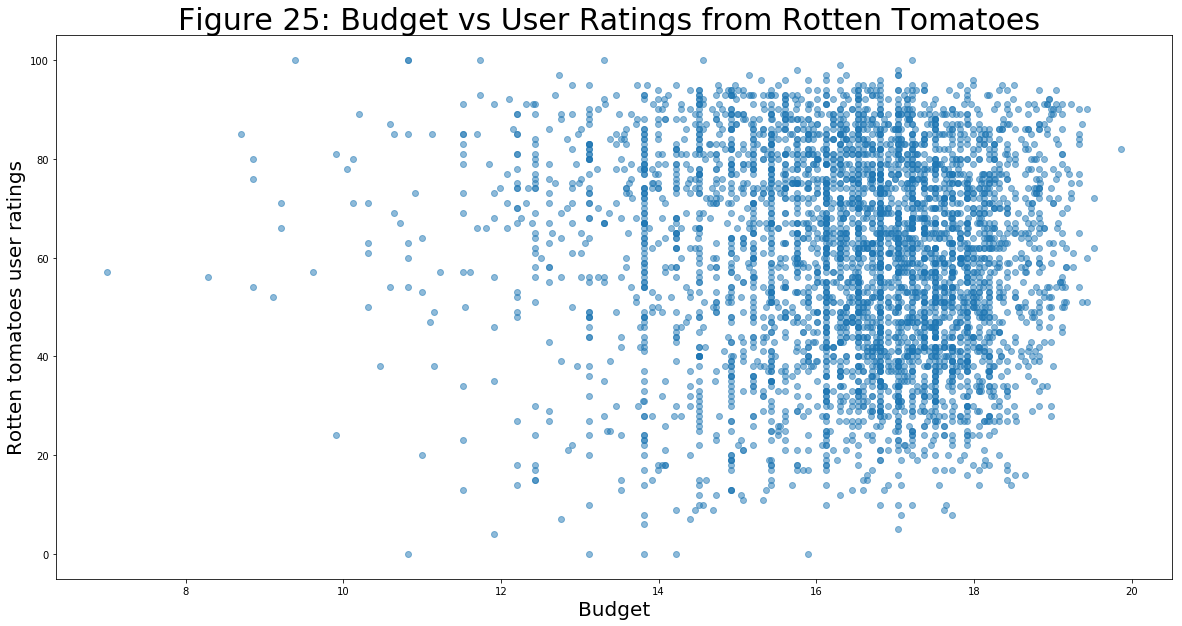

In [46]:
TomatousermeterBudget = df[(df.tomatoUserMeter>=0) & (df.Budget>=0)]  #this will find the relation between the user rating from Rotten Tomatoes and the Tomatometer (critic rating from Rotten Tomatoes)

Columns = ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released','Runtime','Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards','Poster','Metascore','imdbRating','imdbVotes', 'imdbID', 'Type', 'tomatoImage', 'tomatoRating', 'tomatoReviews','tomatoFresh', 'tomatoRotten', 'tomatoConsensus','tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD','BoxOffice', 'Production', 'Website', 'Response', 'tomatoMeter','Domestic_Gross', 'Gross','Date', 'GenreVector','Wins','Nominations']

TomatousermeterBudget = TomatousermeterBudget.drop(Columns,axis=1)

plt.scatter(x = np.log(TomatousermeterBudget.Budget),y = TomatousermeterBudget.tomatoUserMeter,alpha=0.5)

plt.ylabel('Rotten tomatoes user ratings',fontsize=20)

plt.xlabel('Budget',fontsize=20)

plt.title("Figure 25: Budget vs User Ratings from Rotten Tomatoes ",fontsize=30)

plt.rcParams['figure.figsize'] = (10,5)


Answer: From Figure 25 it can be seen that higer budget movies seem to have a higher tomatUserometer (Rotten Tomatoes user ratings) score than lower budget movies and has more frequency of rating scores too. This data is considered valid as in the modern day, big budget blockbuster are the movies are what the common user wants to watch and is what the user reviews. In today's movie market the big budget movies are put up top in the priority list of movie screeings thus are reviewed by more users whereas the lower budget Indie movies are screened in very few or special theatres and not watched as much. This is due to the reason that lower budget Indie movies are given less spotlight due to the fact that the Indie movies are more inclined as art films and their target audience is not too big thus is not for the common audience. Thus these movies get low ratings by users and reviewed also by less users.